<a href="https://colab.research.google.com/github/pedrosoriaa1a/retencion_empleados/blob/main/Retencion_talentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retención de talentos


En el dinámico mundo corporativo, la retención de empleados es un desafío crucial que impacta directamente
en la eficiencia y los resultados financieros de una empresa. Con el aumento de la competencia por el talento
y los altos costos asociados a la contratación y capacitación, el uso estratégico de la ciencia de datos se ha
convertido en una herramienta indispensable. En este contexto, Catapulta DataTech se ha adjudicado un
proyecto que busca reducir la rotación de empleados aplicando modelos analíticos avanzados y de machine
learning, para prever y comprender las dinámicas de retención de empleados. El equipo de recursos humanos
de nuestro cliente, recopiló una gran cantidad de datos sobre sus empleados y desea desarrollar un modelo
que pueda predecir qué empleados tienen más probabilidades de renunciar.


## Librerías a usar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Para ocultar todos los warnings
warnings.filterwarnings("ignore")

## Entendiendo los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hr_data = pd.read_csv("/content/drive/MyDrive/data/human_resources.csv")

In [ ]:
hr_data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

### Sanity Check

In [ ]:
print("El dataset cuenta con {} registros y {} columnas".format(hr_data.shape[0],hr_data.shape[1]))

El dataset cuenta con 1470 registros y 35 columnas


#### Informacion sibre nustras variables y tipo de dato


In [ ]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Valores nulos en el dataset


In [ ]:
hr_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Valores NA


In [ ]:
hr_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Análisis exploratorio de los datos

### Análisis de columnas con valores numéricos


In [ ]:
hr_data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

* Podemos ver que la edad media de los empleados es de casi 37 años, sin embargo el empleado más grande tiene 60 años.
* La distancia más pequeña que un empleado recorre es de 1 unidad y la máxima de 29 unidades
* La satisfacción de los empleados con su entorno laboral podríamos decir que es buena al tener una media de casi 3 en grados de satisfacción
* Es una empresa que tiene buena retención de empleados al tener una media de 7 años de permanencia dentro de la compañía
* Además es una empresa con buena oferta de crecimiento ya que tiene una media de 2 años en promoción de puesto

### Conociendo la variable objetivo (target)

In [ ]:
hr_data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<Axes: xlabel='Attrition', ylabel='count'>

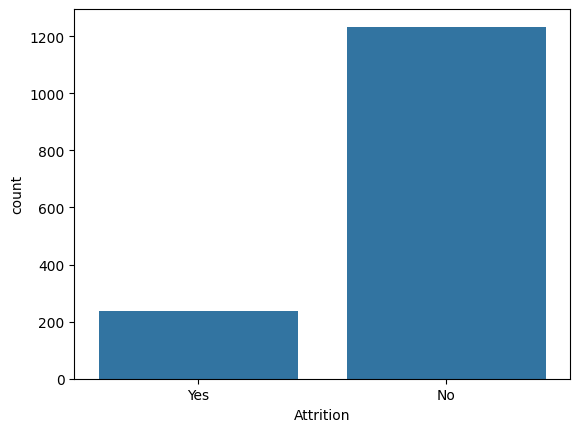

In [ ]:
sns.countplot(data = hr_data, x = 'Attrition')

In [ ]:
# Convirtiendo la variable target (Yes/No) a una binaria numérica

def convertir_a_numerico(valor):
    return 1 if valor == "Yes" else 0

# Aplicar la función a la columna del dataset
hr_data["Attrition"] = hr_data["Attrition"].apply(convertir_a_numerico)

La variable objetivo está desbalanceada, hay *1,233* personas que no han dejado la empresa, mientras que hay un total de *237* personas que si la han dejado.

#### Valores NA

In [ ]:
hr_data.Attrition.isna().sum()

0

#### Valores Nulos

In [ ]:
hr_data.Attrition.isnull().sum()

0

### Valores Atípicos

#### Variables no categoricas

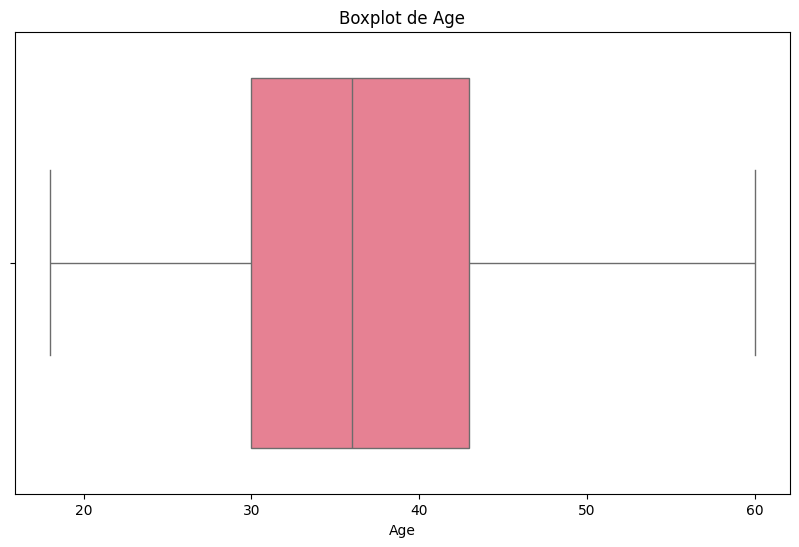

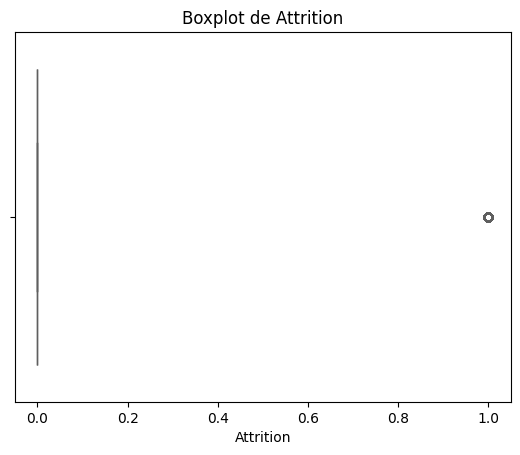

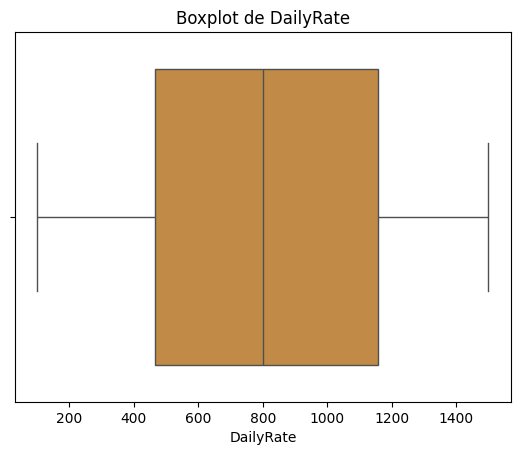

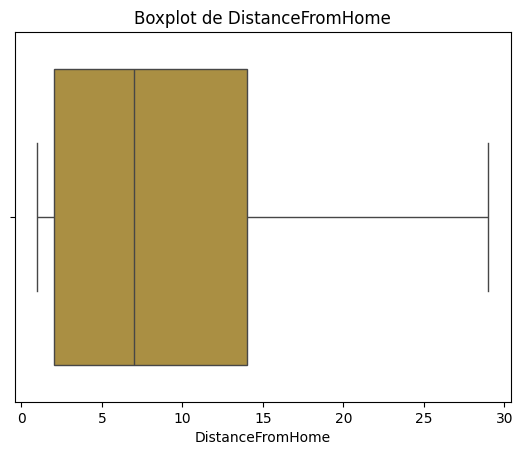

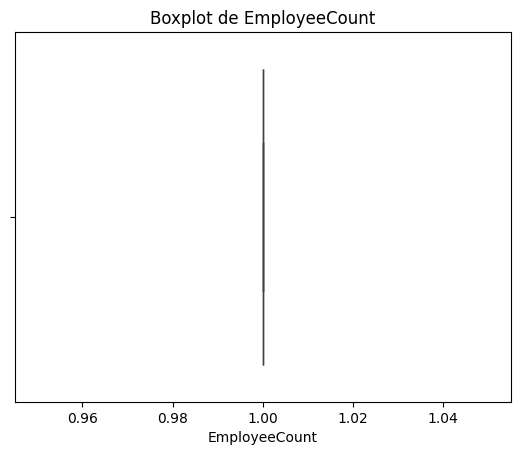

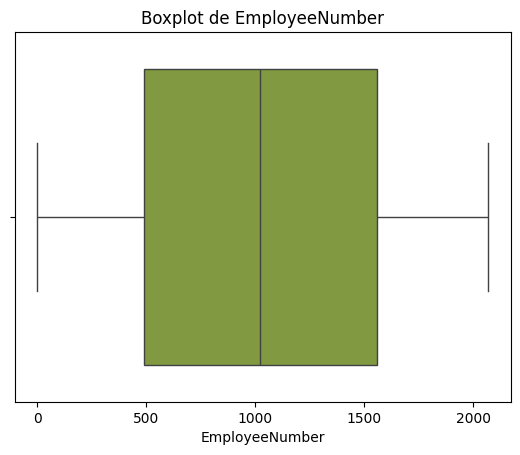

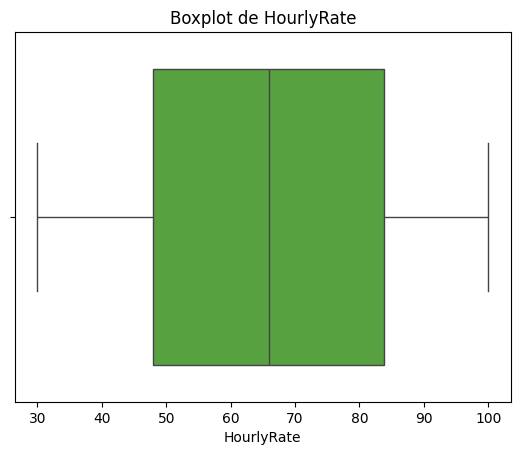

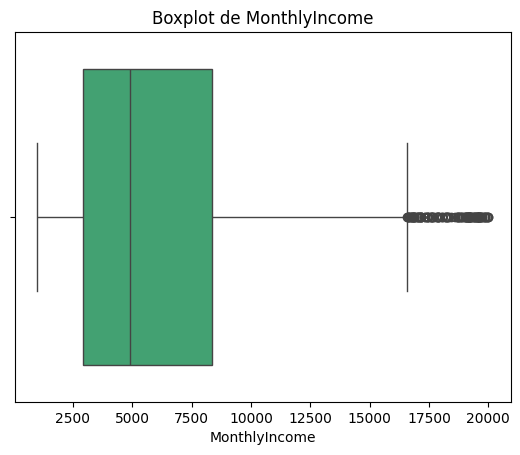

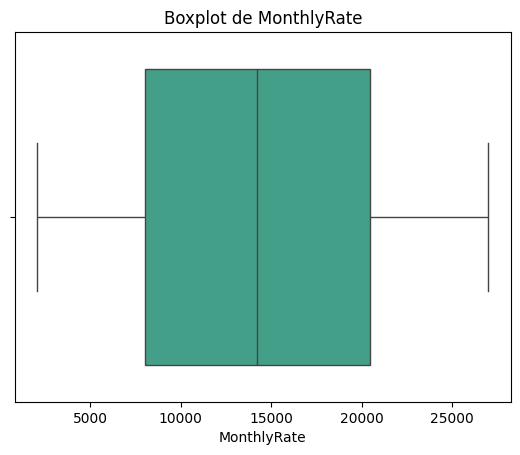

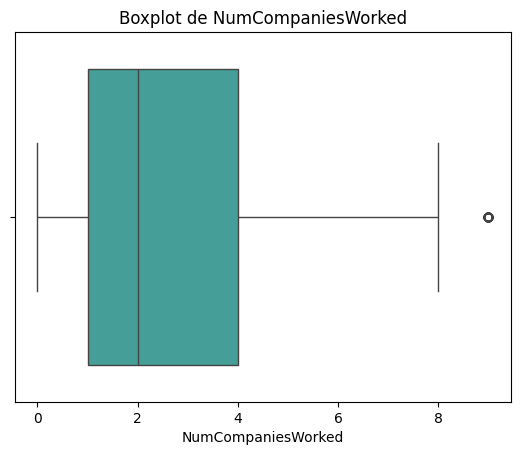

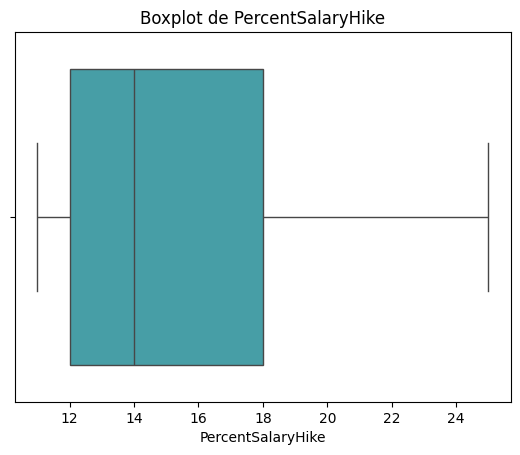

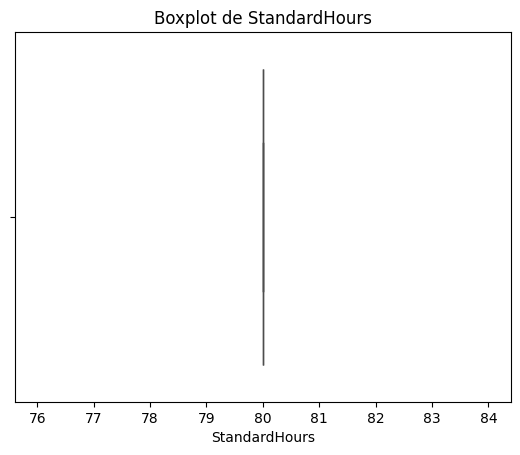

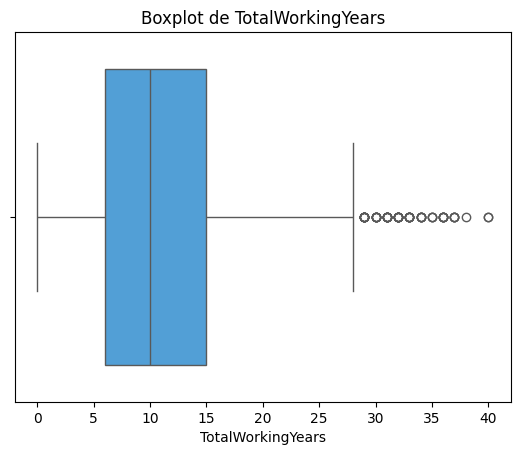

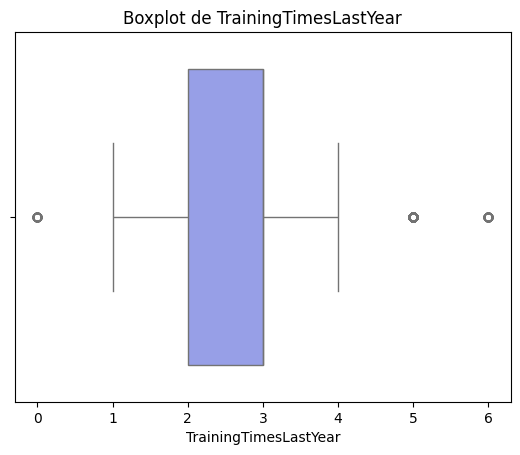

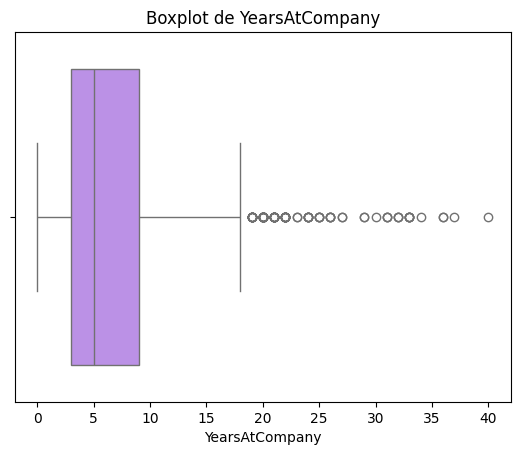

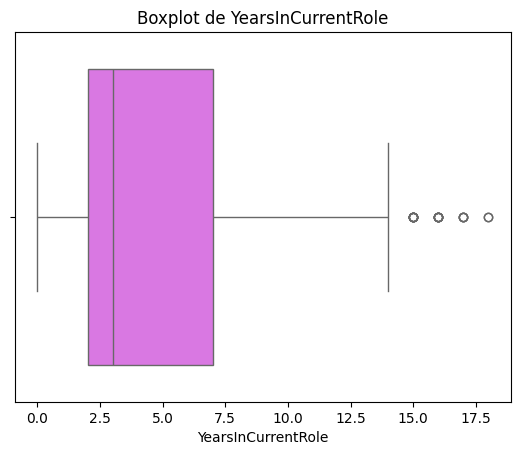

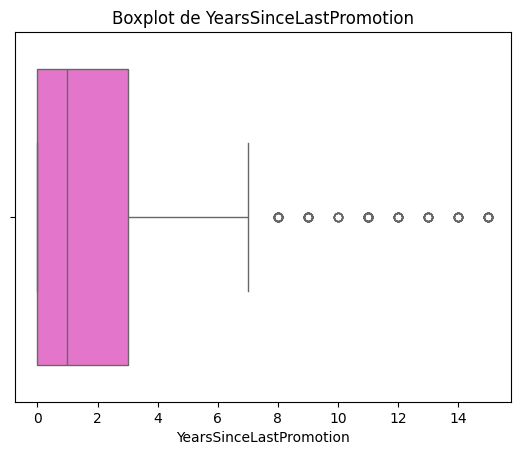

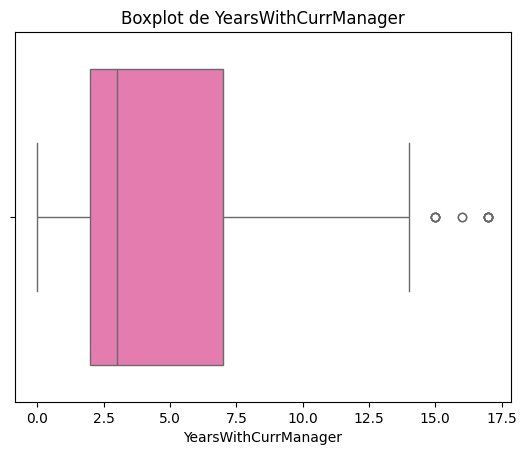

In [ ]:
columnas_numericas = hr_data.select_dtypes(include=['int64', 'float64']).columns
columnas_categoricas = ['PerformanceRating', 'StockOptionLevel', 'WorkLifeBalance', 'JobInvolvement', 'RelationshipSatisfaction', 'EnvironmentSatisfaction', 'JobLevel', 'JobSatisfaction', 'Education']

columnas_numericas = [x for x in columnas_numericas if x not in columnas_categoricas]

plt.figure(figsize=(10, 6))

colores = sns.color_palette("husl", len(columnas_numericas))

for i, columna in enumerate(columnas_numericas):
    sns.boxplot(x=hr_data[columna], color=colores[i])
    plt.title(f'Boxplot de {columna}')
    plt.show()

#### Insights


*   Podemos ver que en promedio los empleados de la empresa reciben una tarifa diaria de 800
*   Además hay 87 empleados que recorren una distancia mayor a 25 para llegar a la empresa, representando el 5.91% de la población
*   También podemos decir que 25.91% de los empleados tienen un ingreso mayor a 8000, donde más del 78% tienen más de 10 años laborando a lo largo de su vida
*   112 empleados han trabajado 25 años o más de trayectoria laboral durante su vida
*   46 empleados tienen más de 13 años desempeñando el mismo roll
*   El 82.31% de los empleados han tenido una promocion en los ultimos 5 años



#### Variables categoricas

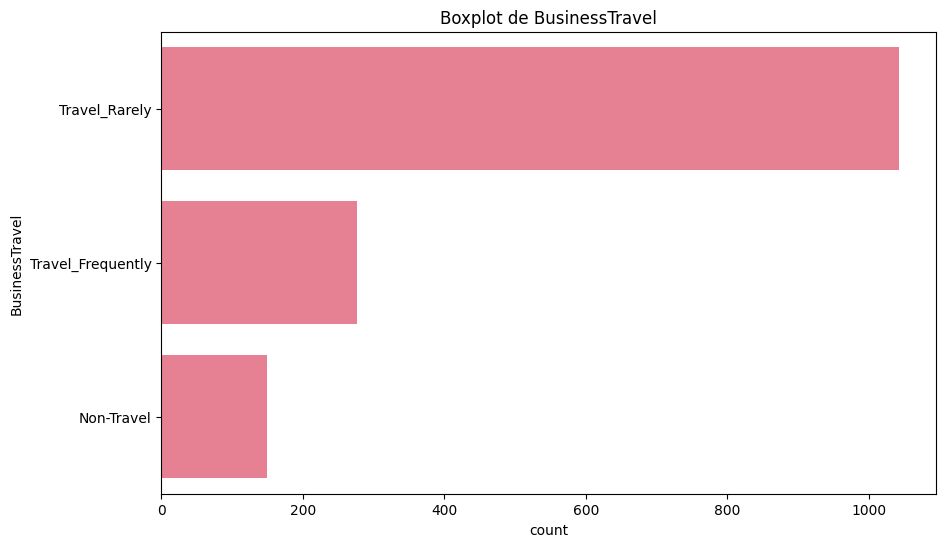

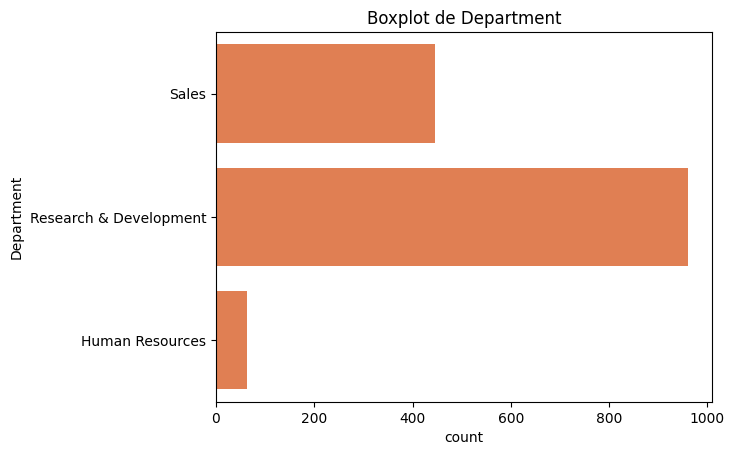

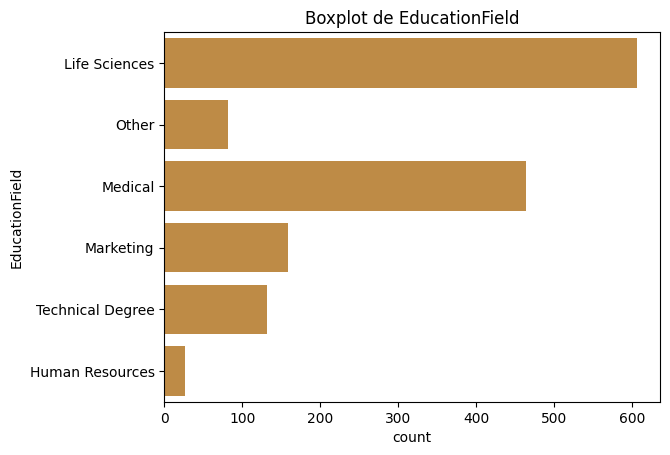

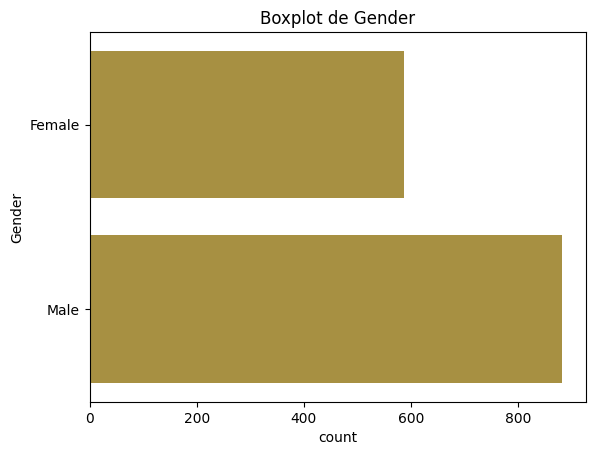

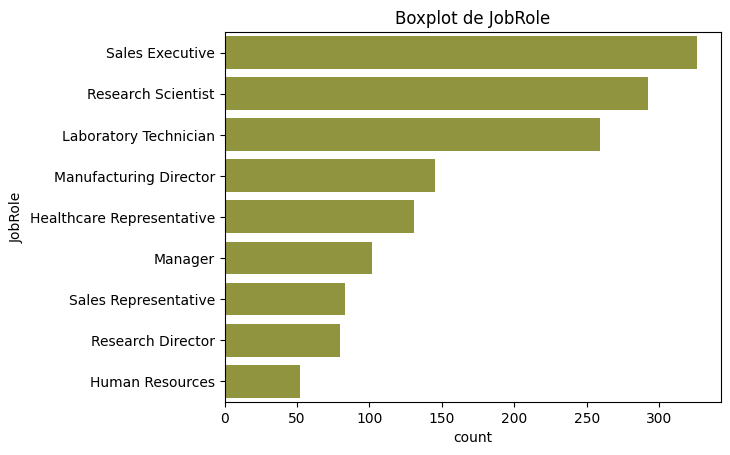

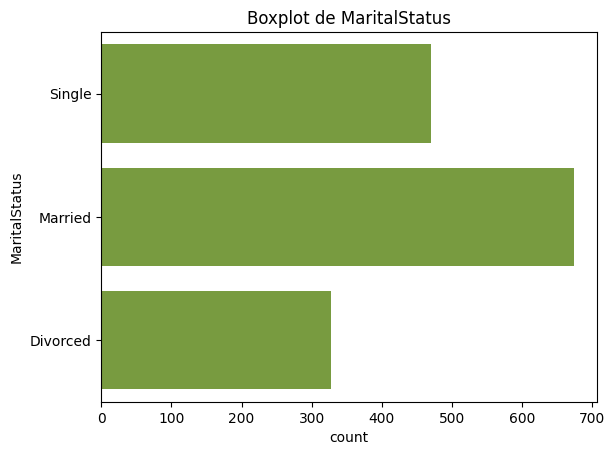

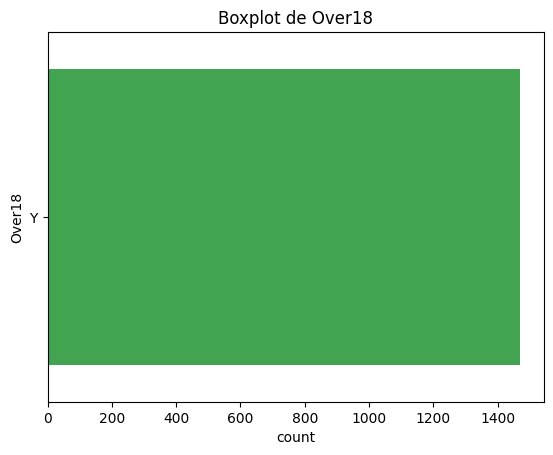

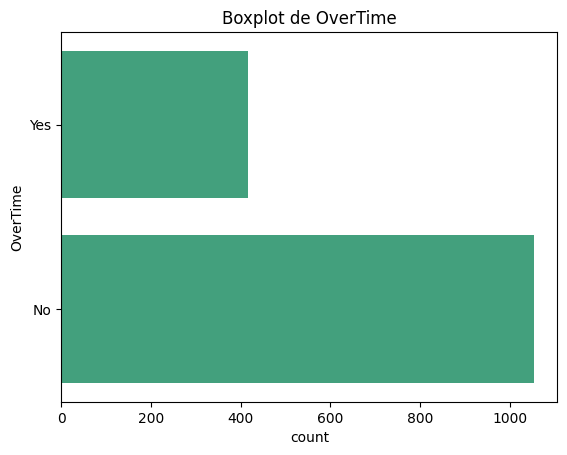

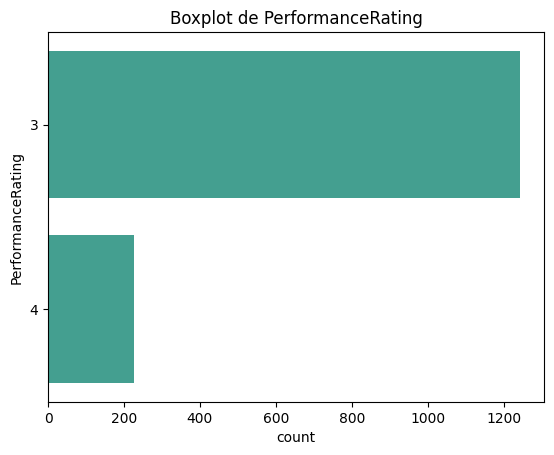

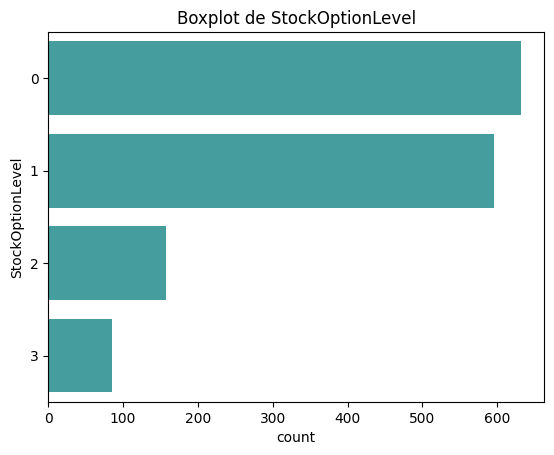

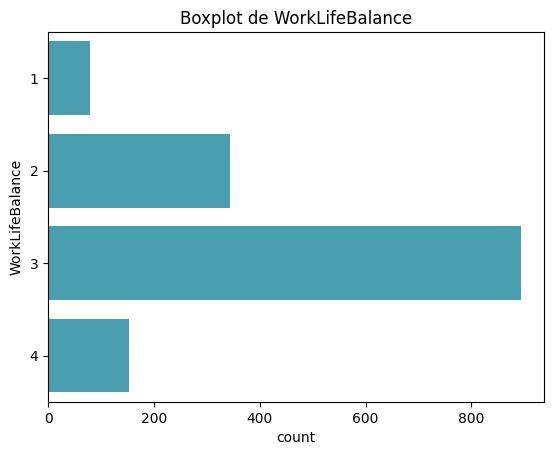

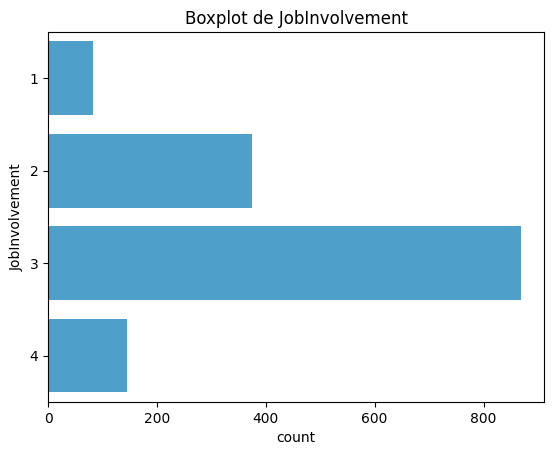

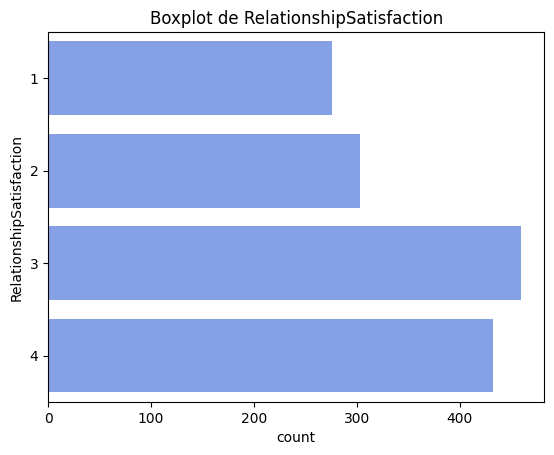

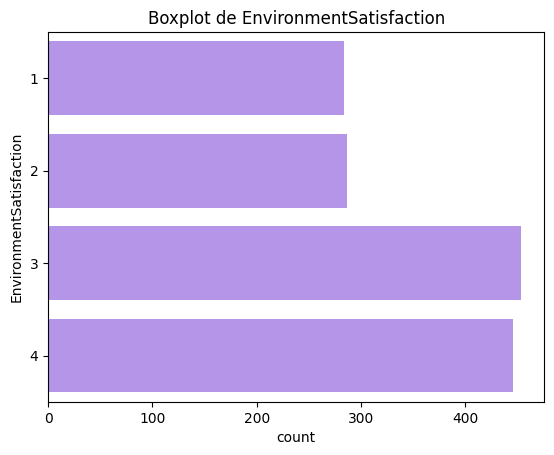

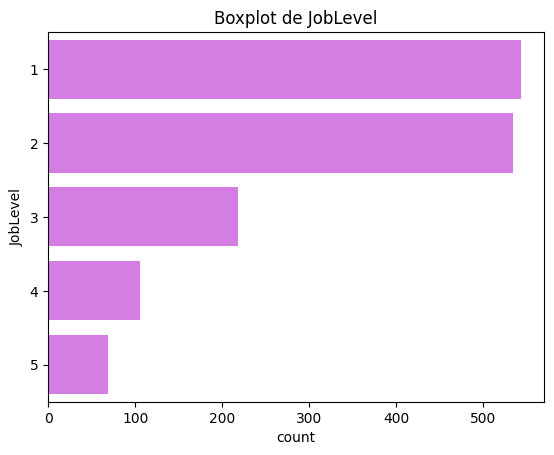

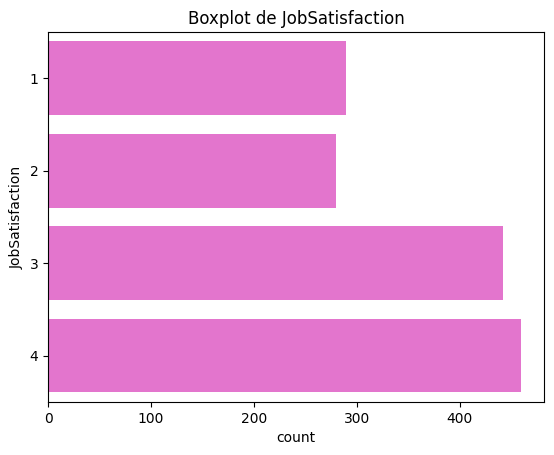

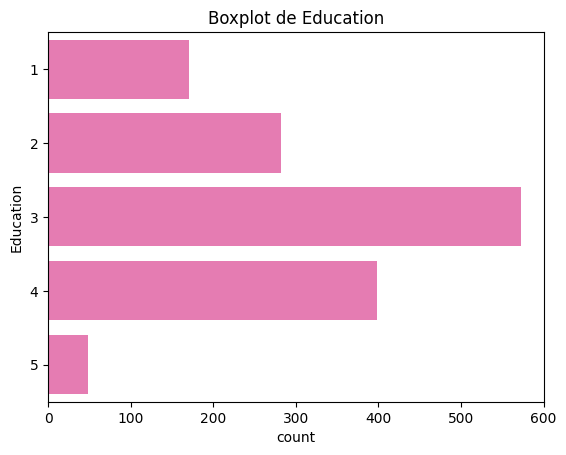

In [ ]:
columnas_no_numericas = hr_data.select_dtypes(include=['object']).columns

columnas_categoricas = pd.Index(columnas_categoricas)
columnas_no_numericas = columnas_no_numericas.append(columnas_categoricas)

plt.figure(figsize=(10, 6))

colores = sns.color_palette("husl", len(columnas_no_numericas))

for i, columna in enumerate(columnas_no_numericas):
    sns.countplot(y = hr_data[columna], color=colores[i])
    plt.title(f'Boxplot de {columna}')
    plt.show()

#### Insights



*   65.37% de los empleados pertenecen al departamento de Research & Development
*   41.22% de los empleados cursaron la carrera en Ciencias de la vida, mientras que el 31.56% son médicos.
*   La empresa en su mayoría tiene ocupados puestos de ejecutivos de ventas con 326 empleados
*   Más de 1,200 empleados tienen una calificación de 3 en rendimiento del trabajo, lo que se podria traducir a que son "buenos empleados"
*   Más del 50% de los empleados encuentran un buen balance de vida dentro de la empres, mismo caso con el nivel de compromiso dentro de la empresa
*  69.25% de los empleados han conseguido por lo menos obtener el grado (licenciatura)



### Distribuciones

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Attrition', ylabel='Age'>,
        <Axes: xlabel='DailyRate', ylabel='Age'>,
        <Axes: xlabel='DistanceFromHome', ylabel='Age'>,
        <Axes: xlabel='Education', ylabel='Age'>,
        <Axes: xlabel='EmployeeCount', ylabel='Age'>,
        <Axes: xlabel='EmployeeNumber', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Attrition'>,
        <Axes: xlabel='Attrition', ylabel='Attrition'>,
        <Axes: xlabel='DailyRate', ylabel='Attrition'>,
        <Axes: xlabel='DistanceFromHome', ylabel='Attrition'>,
        <Axes: xlabel='Education', ylabel='Attrition'>,
        <Axes: xlabel='EmployeeCount', ylabel='Attrition'>,
        <Axes: xlabel='EmployeeNumber', ylabel='Attrition'>],
       [<Axes: xlabel='Age', ylabel='DailyRate'>,
        <Axes: xlabel='Attrition', ylabel='DailyRate'>,
        <Axes: xlabel='DailyRate', ylabel='DailyRate'>,
        <Axes: xlabel='DistanceFromHome', ylabel='DailyRate'>,
        <Ax

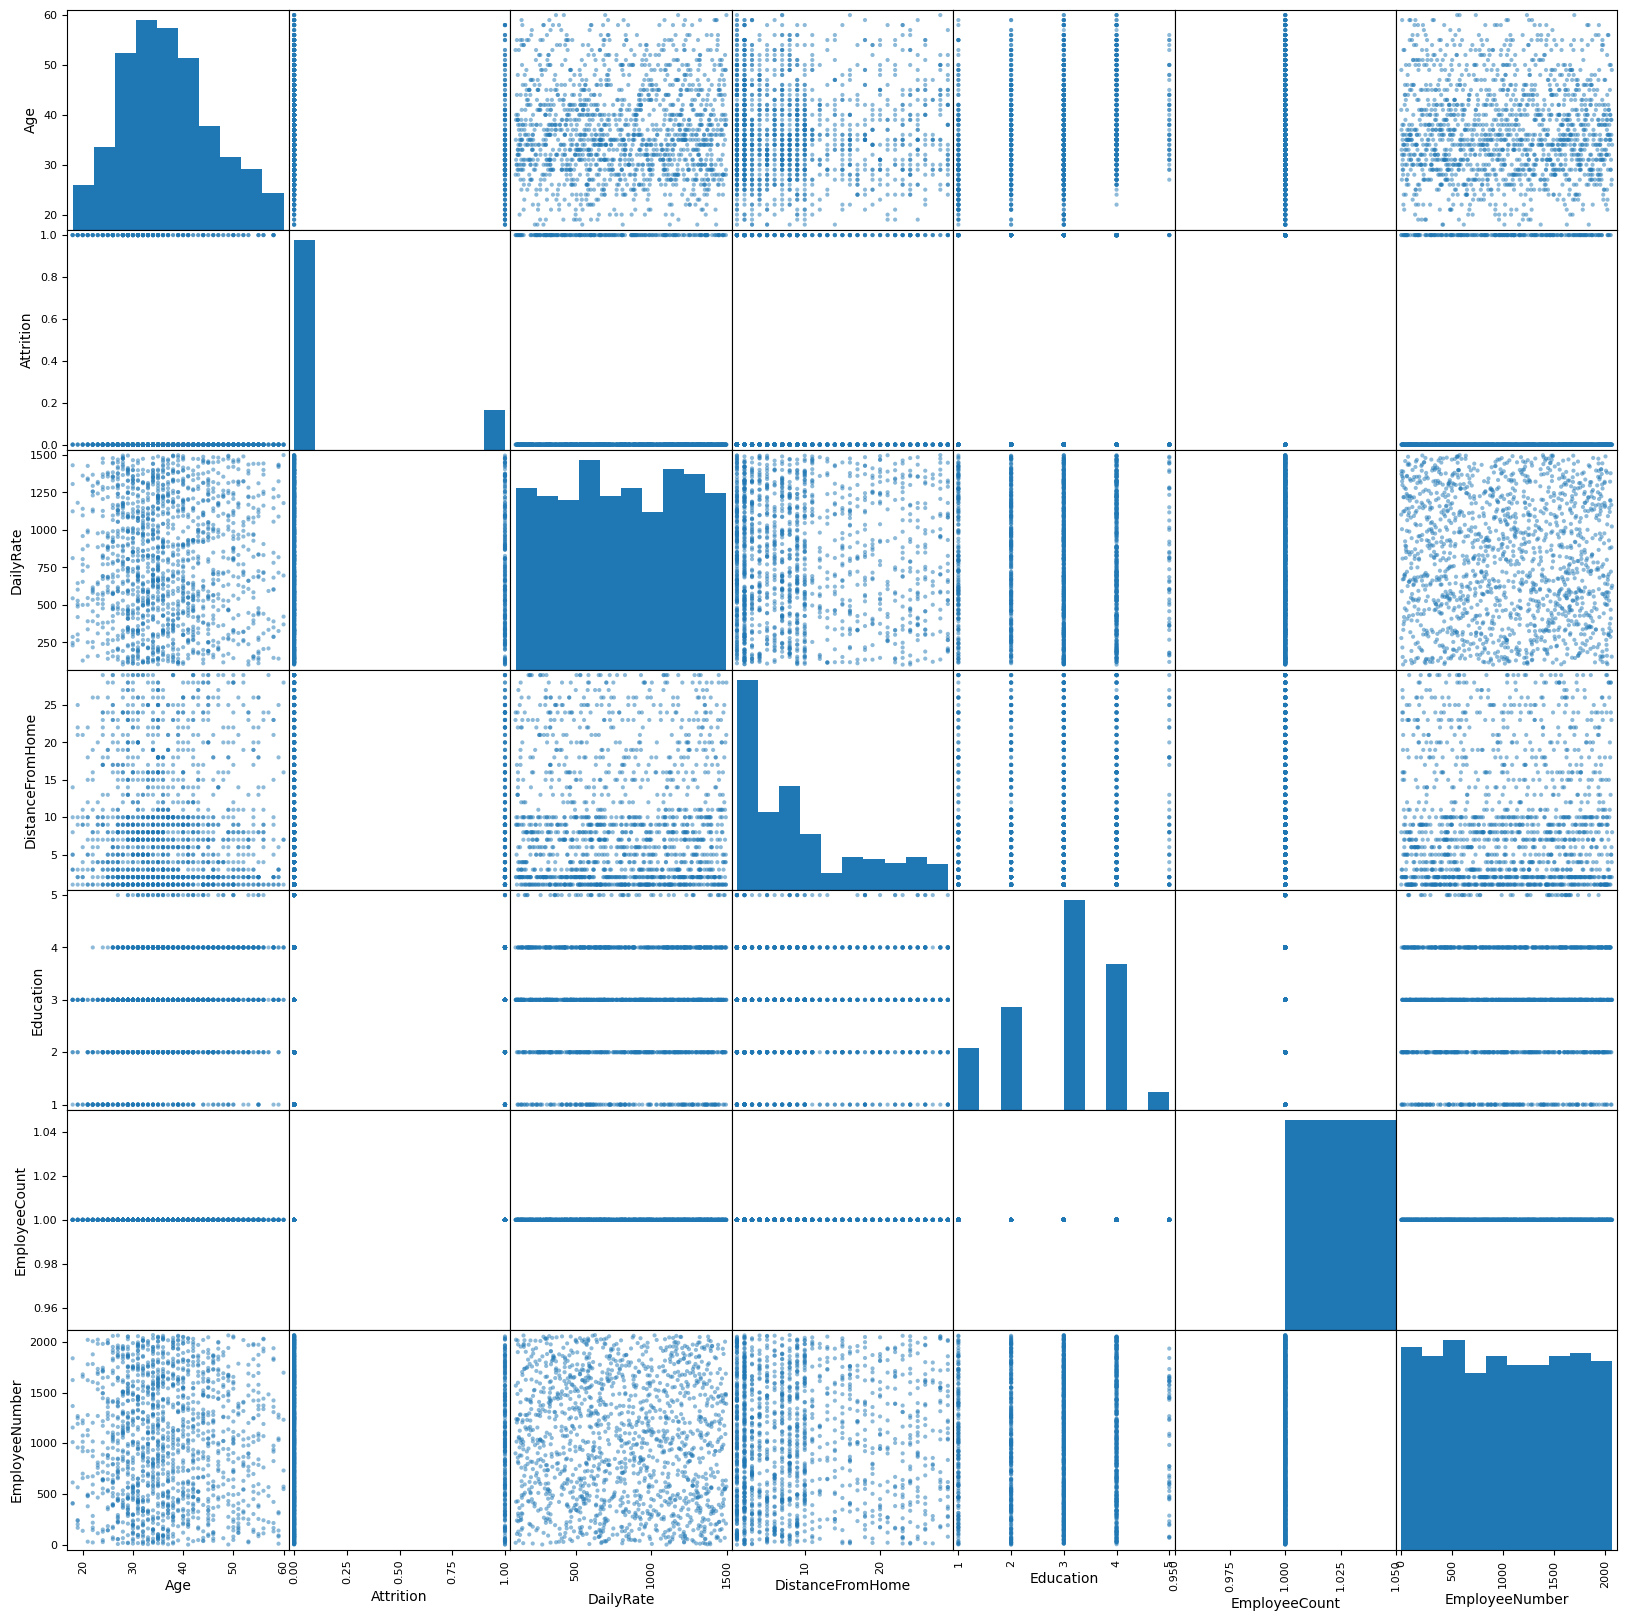

In [ ]:
pd.plotting.scatter_matrix(hr_data.iloc[:,:10],
                           figsize=(20,20))

array([[<Axes: xlabel='HourlyRate', ylabel='HourlyRate'>,
        <Axes: xlabel='JobInvolvement', ylabel='HourlyRate'>,
        <Axes: xlabel='JobLevel', ylabel='HourlyRate'>,
        <Axes: xlabel='JobSatisfaction', ylabel='HourlyRate'>,
        <Axes: xlabel='MonthlyIncome', ylabel='HourlyRate'>],
       [<Axes: xlabel='HourlyRate', ylabel='JobInvolvement'>,
        <Axes: xlabel='JobInvolvement', ylabel='JobInvolvement'>,
        <Axes: xlabel='JobLevel', ylabel='JobInvolvement'>,
        <Axes: xlabel='JobSatisfaction', ylabel='JobInvolvement'>,
        <Axes: xlabel='MonthlyIncome', ylabel='JobInvolvement'>],
       [<Axes: xlabel='HourlyRate', ylabel='JobLevel'>,
        <Axes: xlabel='JobInvolvement', ylabel='JobLevel'>,
        <Axes: xlabel='JobLevel', ylabel='JobLevel'>,
        <Axes: xlabel='JobSatisfaction', ylabel='JobLevel'>,
        <Axes: xlabel='MonthlyIncome', ylabel='JobLevel'>],
       [<Axes: xlabel='HourlyRate', ylabel='JobSatisfaction'>,
        <Axes: xlabel='J

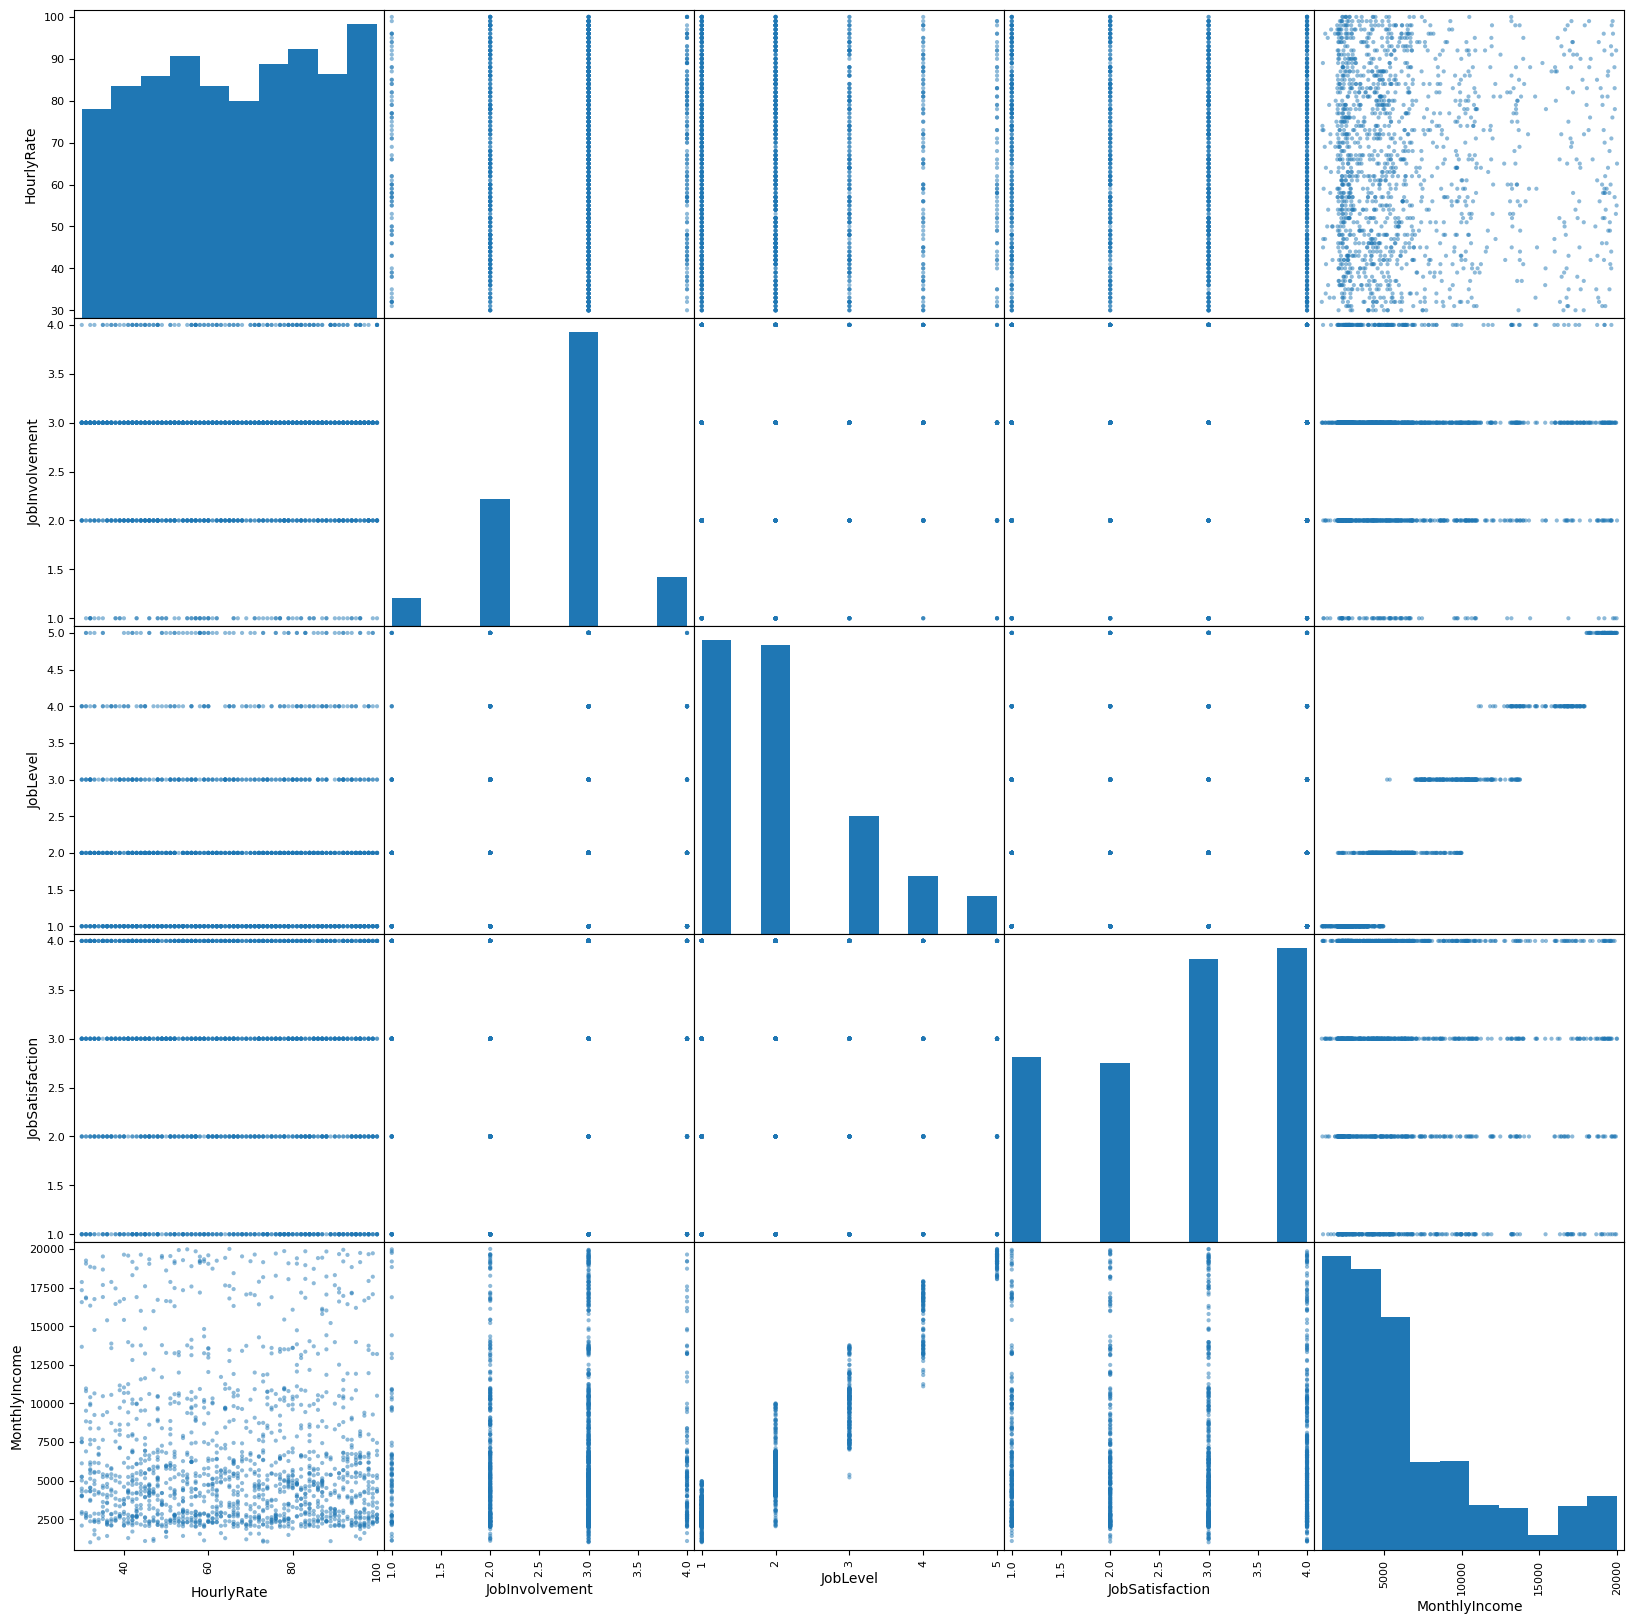

In [ ]:
pd.plotting.scatter_matrix(hr_data.iloc[:,11:19],
                           figsize=(20,20))

array([[<Axes: xlabel='NumCompaniesWorked', ylabel='NumCompaniesWorked'>,
        <Axes: xlabel='PercentSalaryHike', ylabel='NumCompaniesWorked'>,
        <Axes: xlabel='PerformanceRating', ylabel='NumCompaniesWorked'>,
        <Axes: xlabel='RelationshipSatisfaction', ylabel='NumCompaniesWorked'>,
        <Axes: xlabel='StandardHours', ylabel='NumCompaniesWorked'>,
        <Axes: xlabel='StockOptionLevel', ylabel='NumCompaniesWorked'>,
        <Axes: xlabel='TotalWorkingYears', ylabel='NumCompaniesWorked'>],
       [<Axes: xlabel='NumCompaniesWorked', ylabel='PercentSalaryHike'>,
        <Axes: xlabel='PercentSalaryHike', ylabel='PercentSalaryHike'>,
        <Axes: xlabel='PerformanceRating', ylabel='PercentSalaryHike'>,
        <Axes: xlabel='RelationshipSatisfaction', ylabel='PercentSalaryHike'>,
        <Axes: xlabel='StandardHours', ylabel='PercentSalaryHike'>,
        <Axes: xlabel='StockOptionLevel', ylabel='PercentSalaryHike'>,
        <Axes: xlabel='TotalWorkingYears', ylabel=

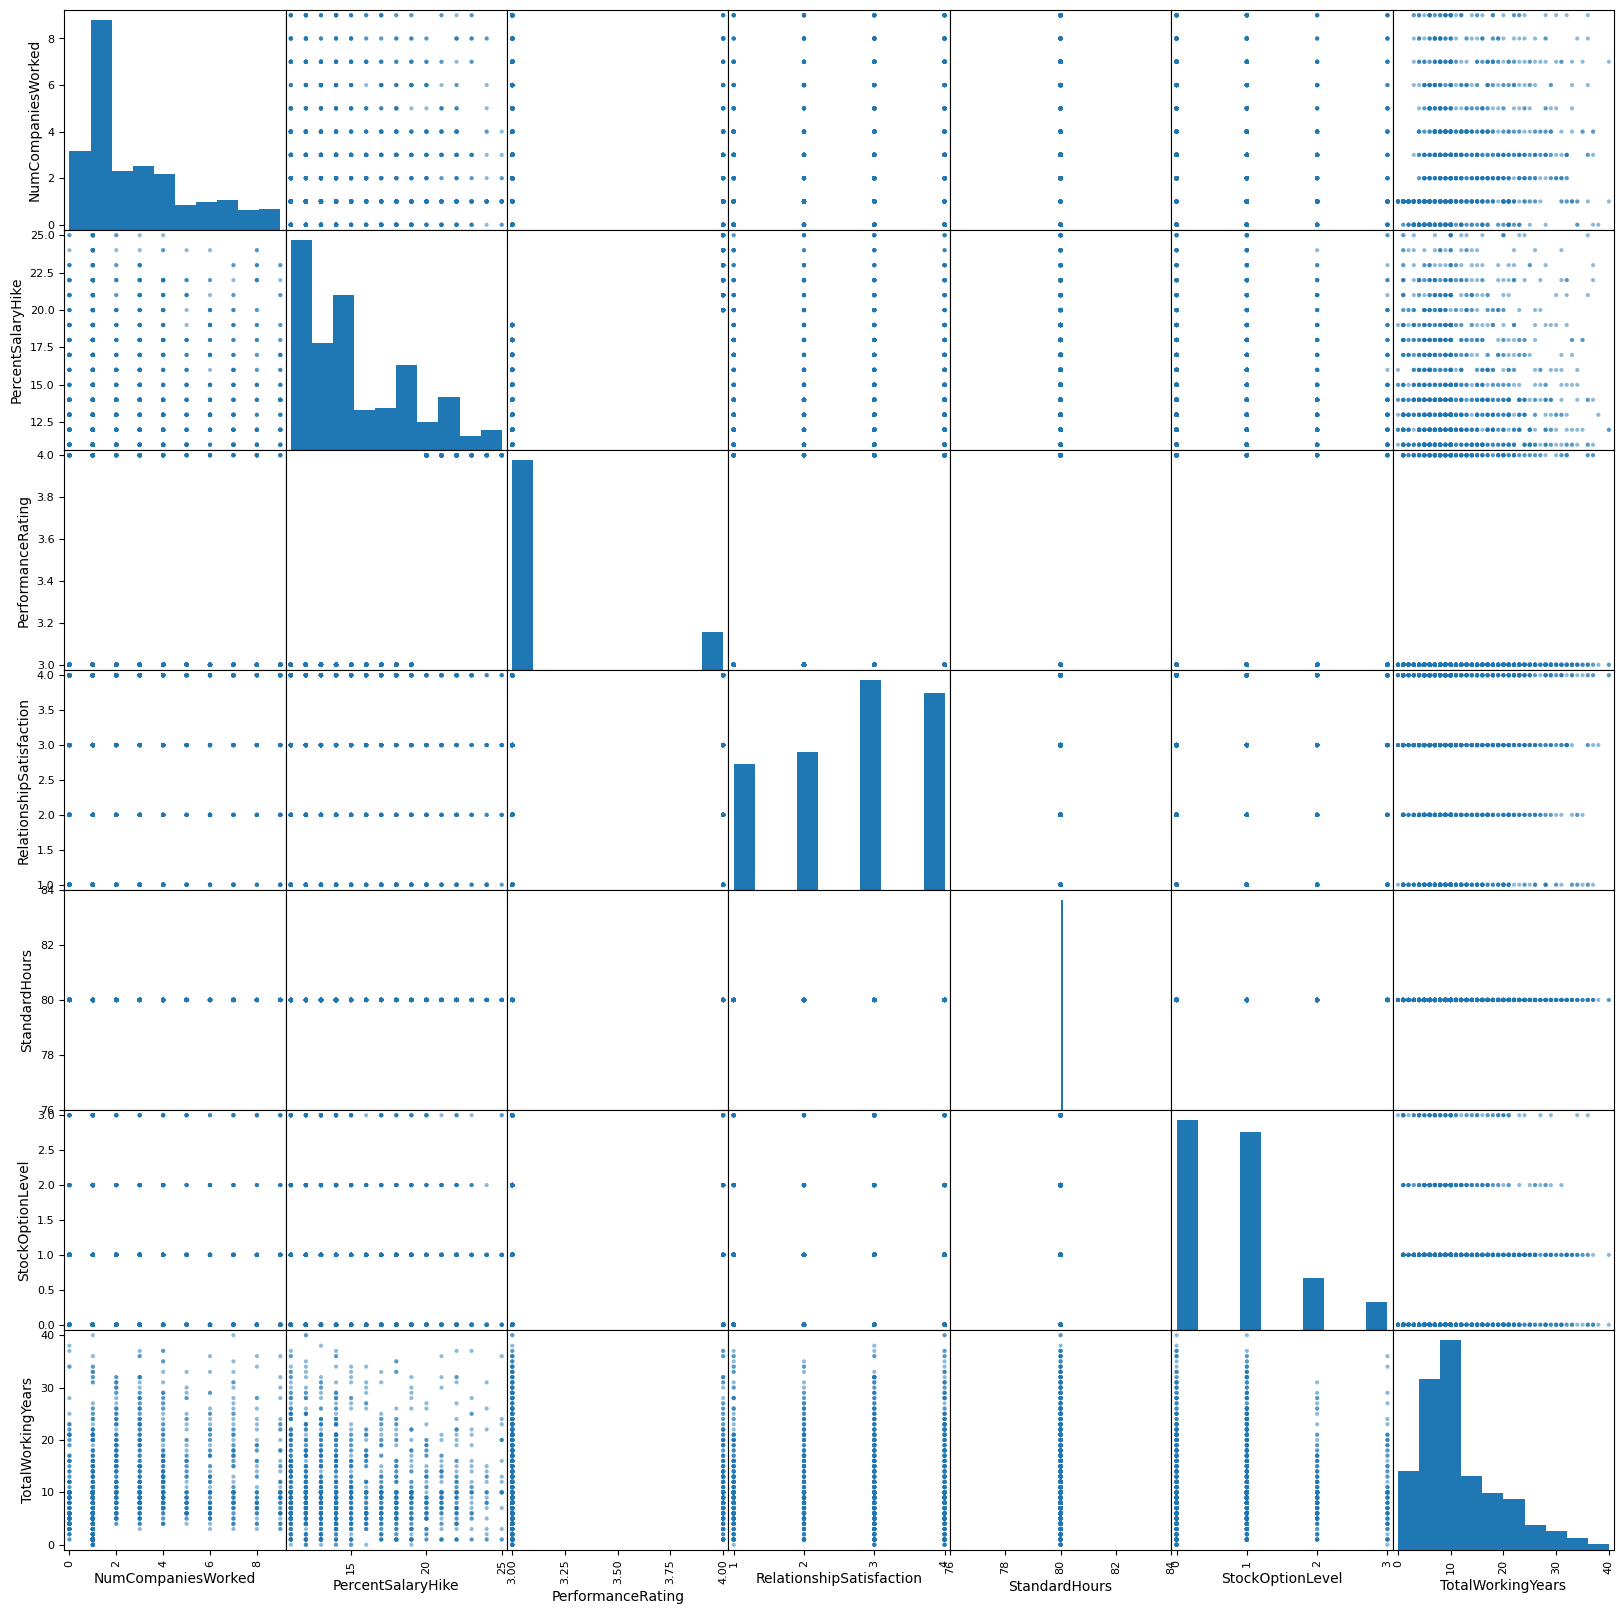

In [ ]:
pd.plotting.scatter_matrix(hr_data.iloc[:,20:29],
                           figsize=(20,20))

array([[<Axes: xlabel='WorkLifeBalance', ylabel='WorkLifeBalance'>,
        <Axes: xlabel='YearsAtCompany', ylabel='WorkLifeBalance'>,
        <Axes: xlabel='YearsInCurrentRole', ylabel='WorkLifeBalance'>,
        <Axes: xlabel='YearsSinceLastPromotion', ylabel='WorkLifeBalance'>,
        <Axes: xlabel='YearsWithCurrManager', ylabel='WorkLifeBalance'>],
       [<Axes: xlabel='WorkLifeBalance', ylabel='YearsAtCompany'>,
        <Axes: xlabel='YearsAtCompany', ylabel='YearsAtCompany'>,
        <Axes: xlabel='YearsInCurrentRole', ylabel='YearsAtCompany'>,
        <Axes: xlabel='YearsSinceLastPromotion', ylabel='YearsAtCompany'>,
        <Axes: xlabel='YearsWithCurrManager', ylabel='YearsAtCompany'>],
       [<Axes: xlabel='WorkLifeBalance', ylabel='YearsInCurrentRole'>,
        <Axes: xlabel='YearsAtCompany', ylabel='YearsInCurrentRole'>,
        <Axes: xlabel='YearsInCurrentRole', ylabel='YearsInCurrentRole'>,
        <Axes: xlabel='YearsSinceLastPromotion', ylabel='YearsInCurrentRole'>,

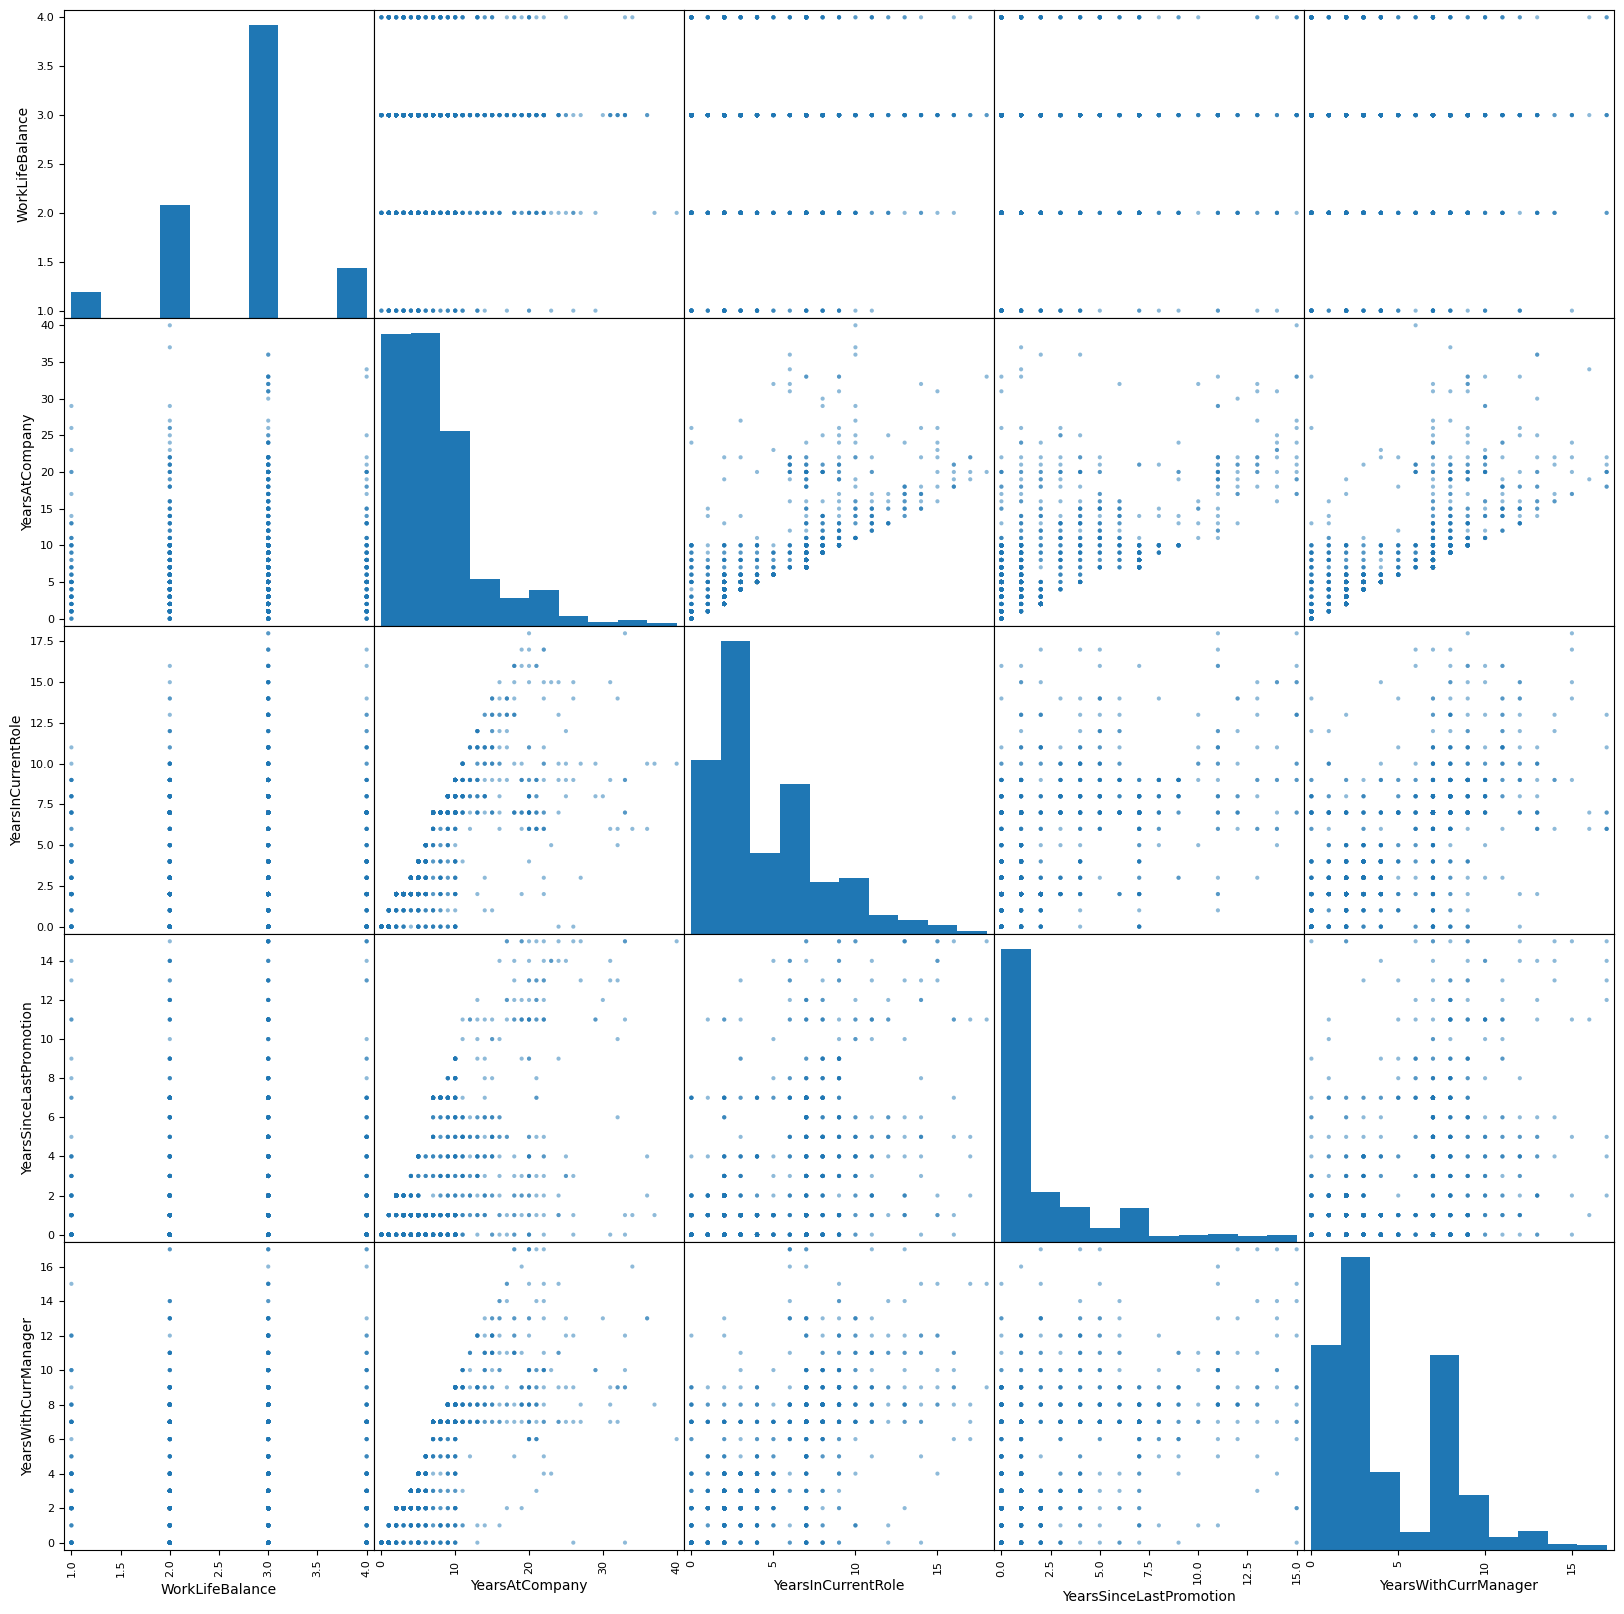

In [ ]:
pd.plotting.scatter_matrix(hr_data.iloc[:,30:],
                           figsize=(20,20))

### Hipótesis

#### ¿El sueldo del empleado es en función del tiempo que el empleado tiene laborando en la empresa?

#### ¿El nivel educacional tiene relación con el nivel dentro de la empresa?

#### ¿El puesto de trabajo (nivel) depende del número de años que un empleado ha dedicado a su vida laboral?

#### ¿El balance de vida está relacionado con el sueldo mensual que recibe un empleado?


### Correlaciones

In [ ]:
corr = hr_data.corr()

corr.style.background_gradient(cmap = 'GnBu_r').set_precision(2)

<Figure size 5000x5000 with 0 Axes>

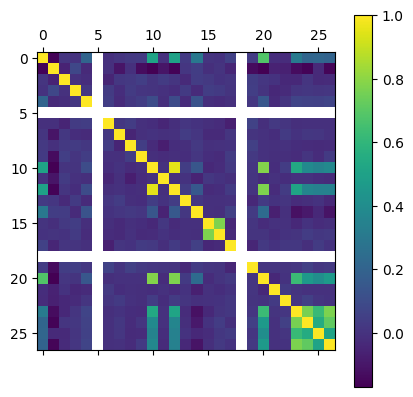

In [ ]:
plt.figure(figsize = (50,50))
plt.matshow(hr_data.corr())
plt.colorbar()

Viendo las matrices de correlación podemos hacer varias afirmaciones y contestar las hipótesis realizadas más arriba:


*   Hay una fuerte correlación entre el sueldo mensual con el nivel dentro de la empresa (puesto), además también está relacionado con los años que los empleados han dedicado a su vida laboral
*   Los empleados que han tenido una calificación 'buena' dentro del trabajo son recompensados con el aumento en salario
*   Además los empleados que tienen más años en la empresa han tenido una promoción de puesto
*   El balance de vida del empleado no está relacionado con el salario mensual


#### Gráficos de dispersión

Se elabora el siguiente bloque de código para obtener los gráficos de dispersión de llas variables con una correlación mayor al 50%

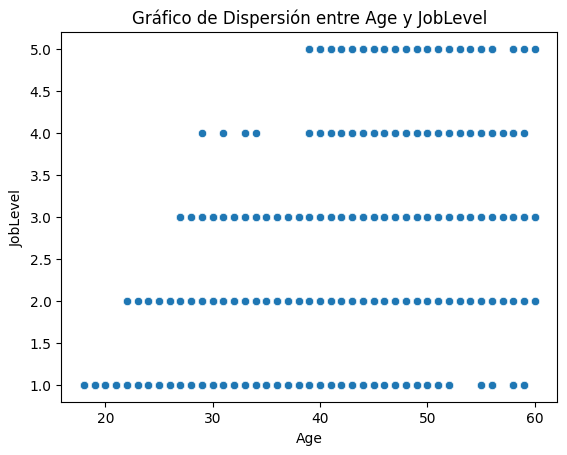

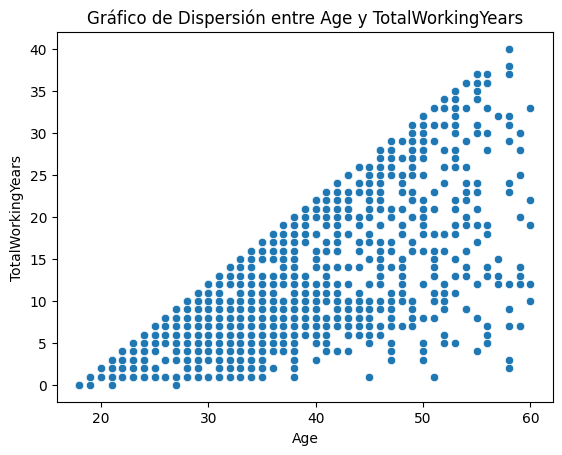

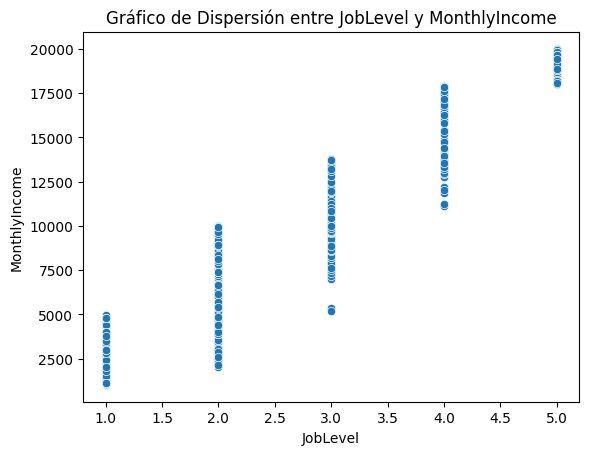

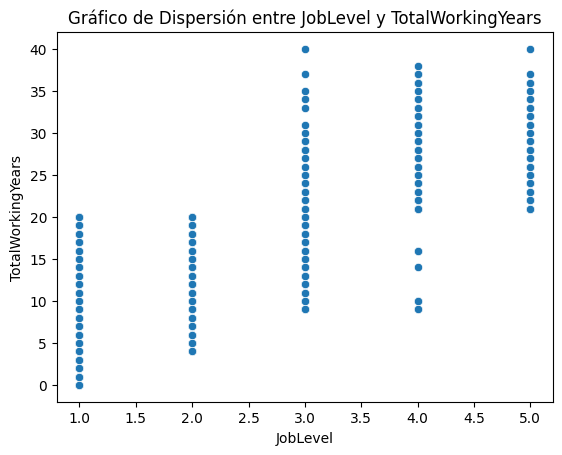

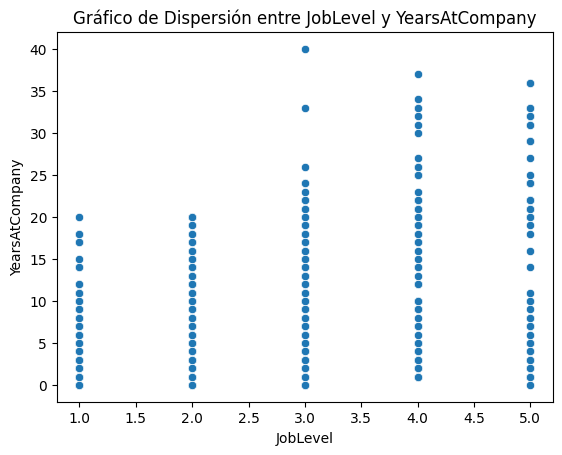

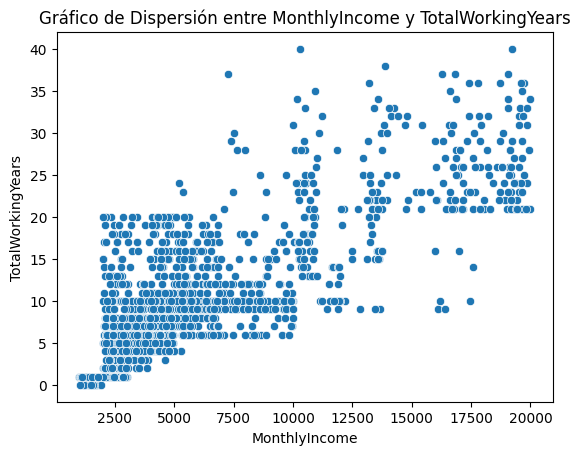

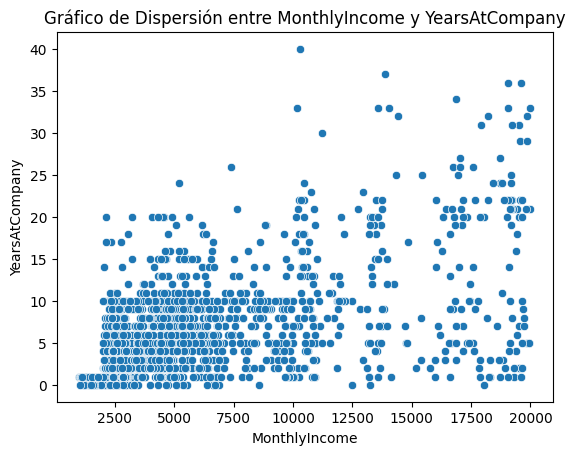

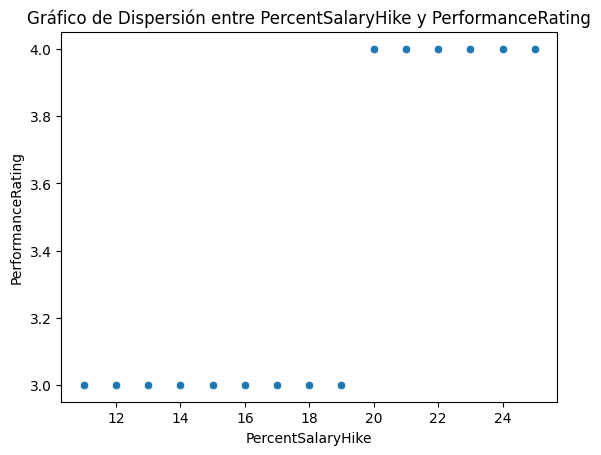

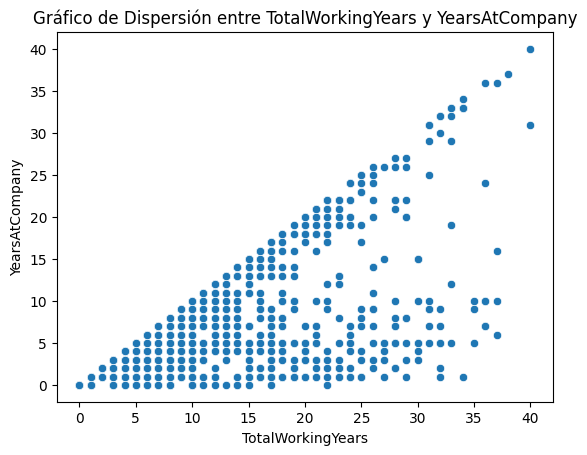

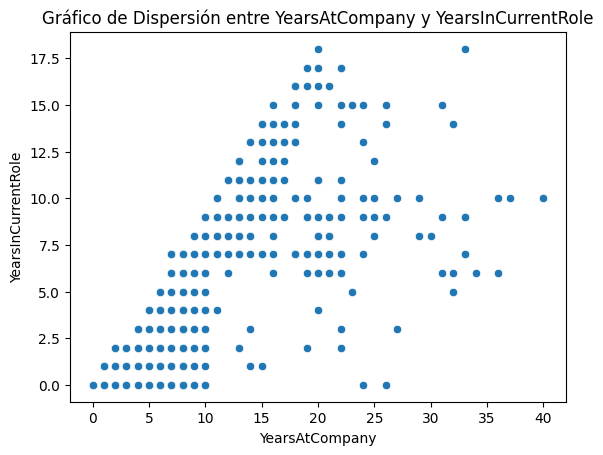

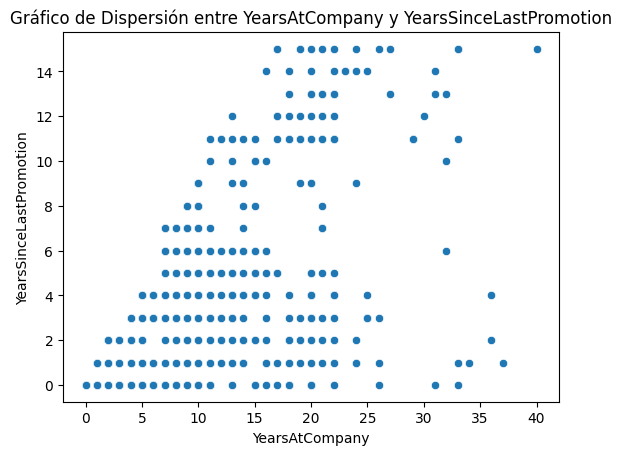

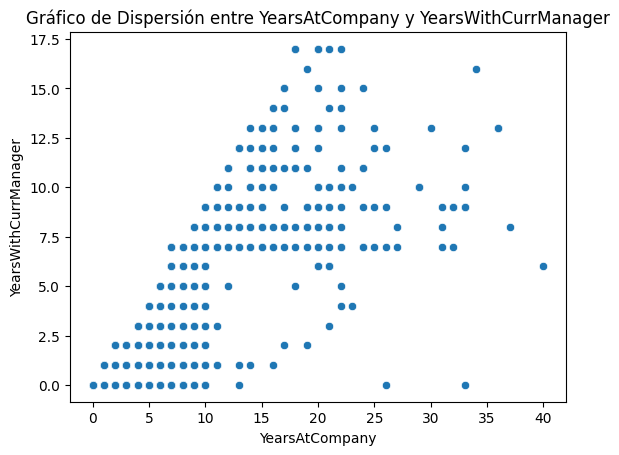

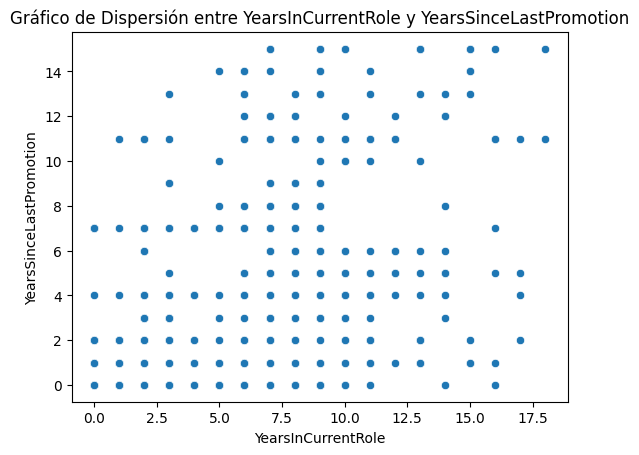

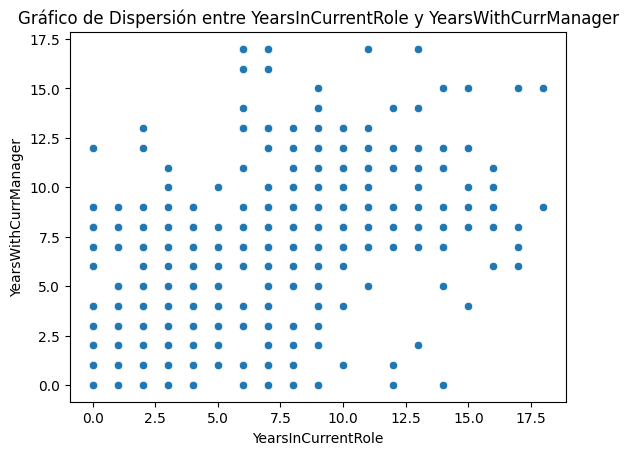

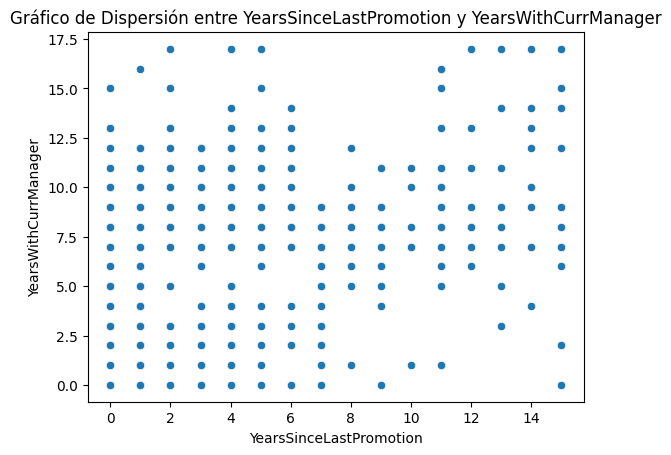

In [ ]:
parejas_correlacionadas = []
umbral_correlacion = 0.5

for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > umbral_correlacion:
            parejas_correlacionadas.append((corr.columns[i], corr.columns[j]))

for pareja in parejas_correlacionadas:
    x_variable, y_variable = pareja
    sns.scatterplot(x=x_variable, y=y_variable, data=hr_data)
    plt.title(f'Gráfico de Dispersión entre {x_variable} y {y_variable}')
    plt.show()

* El total de años que un empleado le ha dedicado a su carrera profesional va fuertemente relacionado con el salario que percibe
* Sin embargo pareciera que no importa mucho el tiempo que se tiene dentro de la empresa para tener un sueldo 'bueno'
* El aumento salarial si depende de la calificación que el empleado obtenga
* Entre más años se tengan en la compañía pareciera que es más sencillo obtener una promoción de puesto

### Reduciendo dimensionalidad

Después del analisis estadístico se llega a la conclusión de eliminar las siguientes variables ya que no aportan información:


*  Over18
*  StandardHours
*  EmployeeNumber
*  EmployeCount




In [ ]:
columnas_a_eliminar = ['Over18', 'StandardHours', 'EmployeeNumber', 'EmployeeCount']
hr_data = hr_data.drop(columns = columnas_a_eliminar)

El dataset pasa de tener 35 columnas a 31

In [ ]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

## Variables para el modelo

### Encoding

Para obtener las 'features' que se van a utilizar para obtener una predicción del modelo es necesario codificar algunas de ellas por el tipo de dato que son.
Las siguientes variables son las que se van a codificar:


*   BusinessTravel
*   EducationField
*   Gender
*   JobRole
*   MaritalStatus
*   OverTime



In [ ]:
# Funcion que implementa Label Encoding a cualquier variable dentro del dataset
def label_encode_variable(dataset, variable_name):
    """
    Aplica Label Encoding a una variable específica en el dataset.

    Parámetros:
    - dataset: DataFrame de pandas que contiene el dataset.
    - variable_name: Nombre de la variable a la que se aplicará Label Encoding.

    Retorna:
    - El dataset con la variable label encoded añadida.
    """
    le = LabelEncoder()
    dataset[variable_name + '_label_encoded'] = le.fit_transform(dataset[variable_name])
    return dataset


In [ ]:
# Columnas tipo object
columnas_object = hr_data.select_dtypes(include=['object']).columns

# Aplicando función label_encode_variable
for columna in columnas_object:
    hr_data = label_encode_variable(hr_data, columna)

In [ ]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1470 non-null   int64 
 1   Attrition                     1470 non-null   int64 
 2   BusinessTravel                1470 non-null   int64 
 3   DailyRate                     1470 non-null   int64 
 4   Department                    1470 non-null   object
 5   DistanceFromHome              1470 non-null   int64 
 6   Education                     1470 non-null   int64 
 7   EducationField                1470 non-null   object
 8   EnvironmentSatisfaction       1470 non-null   int64 
 9   Gender                        1470 non-null   object
 10  HourlyRate                    1470 non-null   int64 
 11  JobInvolvement                1470 non-null   int64 
 12  JobLevel                      1470 non-null   int64 
 13  JobRole           

In [ ]:
features = list(hr_data.columns)
features = [x for x in features if x not in columnas_object]
features.remove("Attrition")

objetive = ['Attrition']

In [ ]:
df_train = hr_data.dropna(subset=['Attrition'])

In [ ]:
X = df_train[features]
X

Age  BusinessTravel  DailyRate  DistanceFromHome  Education  \
0      41               2       1102                 1          2   
1      49               1        279                 8          1   
2      37               2       1373                 2          2   
3      33               1       1392                 3          4   
4      27               2        591                 2          1   
...   ...             ...        ...               ...        ...   
1465   36               1        884                23          2   
1466   39               2        613                 6          1   
1467   27               2        155                 4          3   
1468   49               1       1023                 2          3   
1469   34               2        628                 8          3   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                           2          94               3         2   
1                           3          61               2         2   
2                           4          92               2         1   
3                           4          56               3         1   
4                           1          40               3         1   
...                       ...         ...             ...       ...   
1465                        3          41               4         2   
1466                        4          42               2         3   
1467                        2          87               4         2   
1468                        4          63               2         2   
1469                        2          82               4         2   

      JobSatisfaction  ...  YearsAtCompany  YearsInCurrentRole  \
0                   4  ...               6                   4   
1                   2  ...              10                   7   
2                   3  ...               0                   0   
3                   3  ...               8                   7   
4                   2  ...               2                   2   
...               ...  ...             ...                 ...   
1465                4  ...               5                   2   
1466                1  ...               7                   7   
1467                2  ...               6                   2   
1468                2  ...               9                   6   
1469                3  ...               4                   3   

      YearsSinceLastPromotion  YearsWithCurrManager  Department_label_encoded  \
0                           0                     5                         2   
1                           1                     7                         1   
2                           0                     0                         1   
3                           3                     0                         1   
4                           2                     2                         1   
...                       ...                   ...                       ...   
1465                        0                     3                         1   
1466                        1                     7                         1   
1467                        0                     3                         1   
1468                        0                     8                         2   
1469                        1                     2                         1   

      EducationField_label_encoded  Gender_label_encoded  \
0                                1                     0   
1                                1                     1   
2                                4                     1   
3                                1                     0   
4                                3                     1   
...                            ...                   ...   
1465                             3                     1   
1466                             3                     1   
1467              

In [ ]:
y = df_train[objetive]
y

Attrition
0             1
1             0
2             1
3             0
4             0
...         ...
1465          0
1466          0
1467          0
1468          0
1469          0

[1470 rows x 1 columns]

## Elección del modelo

Podemos decir que es un problema de clasificación ya que la V.O. tiene dos clases:


*   El empleado ha dejado la empresa: 1
*   El empleado NO ha dejado la empresa: 0

Ante esto se evaluarán dos modelos para elegir al mejor.

### SVM

#### Dividir dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                        random_state = 1998)

#### Ejecutando modelo

In [ ]:
# Creamos el modelo
svc = LinearSVC()
svc.probability = True
# Ajustamos el modelo a los datos de entrenamiento
svc.fit(X_train, y_train)

# Realizamos la predicción
y_pred = svc.predict(X_test)

#### Evaluando modelo

In [ ]:
# Score en datos de entrenamiento
svc.score(X_train, y_train)

0.7806122448979592

In [ ]:
# Score en datos de test
svc_accuracy = svc.score(X_test, y_test)
svc_accuracy

0.8571428571428571

In [ ]:
# recall_svc = recall_score(X_test, y_test, average='weighted')
#tp / (tp + fn)
recall_svc = 12 / (12 + 29)
recall_svc

0.2926829268292683

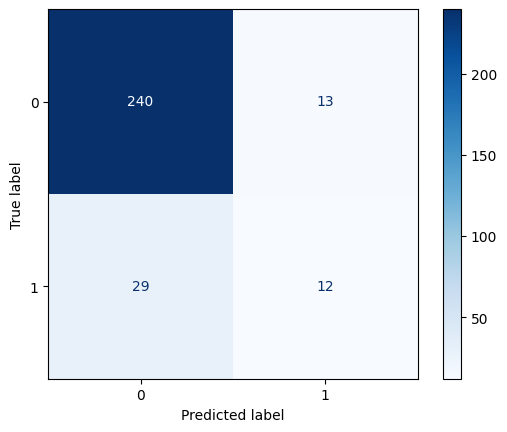

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=svc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       253
           1       0.48      0.29      0.36        41

    accuracy                           0.86       294
   macro avg       0.69      0.62      0.64       294
weighted avg       0.83      0.86      0.84       294



In [ ]:
# Curva de validación

range_k = [x for x in range(1,10,3)]

train_score, test_score = validation_curve(svc,
                X,
                y,
                param_name = 'C',
                param_range = range_k,
                cv = 3,
                scoring='recall')

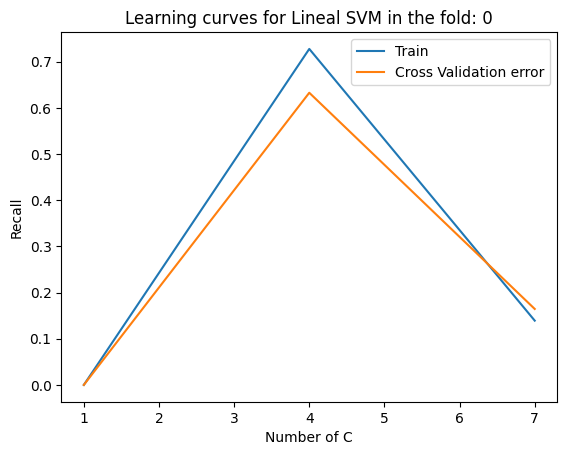

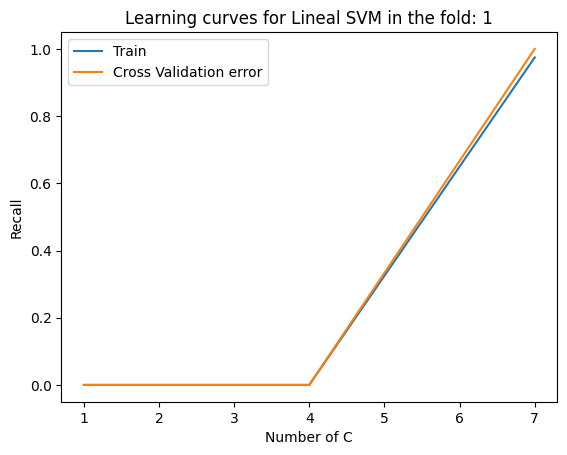

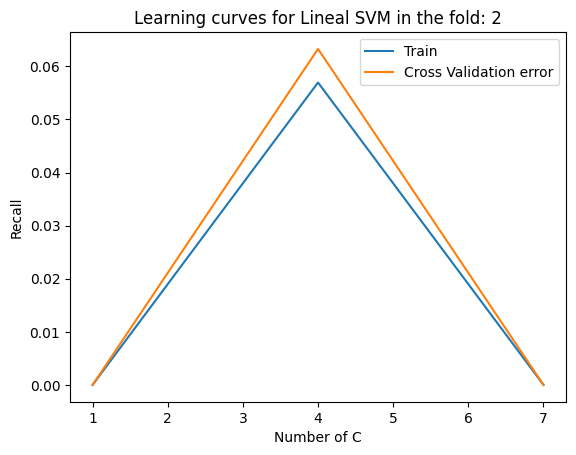

In [ ]:
for i in range(len(train_score)):
  plt.plot(range_k,
          train_score[i],
          label='Train')
  plt.plot(range_k,
          test_score[i],
          label='Cross Validation error')
  plt.title('Learning curves for Lineal SVM in the fold: ' + str(i))
  plt.xlabel('Number of C')
  plt.ylabel('Recall')
  plt.legend()
  plt.show()

#### Conclusiones del modelo

De acuerdo a las métricas obtenidas, se puede decir que:

**Precision y Recall para la Clase 0 (Empleados que no han dejado la empresa):**

* Precision para la clase 0: 0.89

* Recall para la clase 0: 0.95


La precisión del 89% nos dice que, de todas las predicciones positivas para empleados que no han dejado la empresa, el 89% son correctas.

El recall del 95% sugiere que el modelo identifica correctamente al 95% de los empleados que no han dejado la empresa.


**Precision y Recall para la Clase 1 (Empleados que ya han dejado la empresa):**

* Precision para la clase 1: 0.48

* Recall para la clase 1: 0.29

Una precisión del 48% indica que, de todas las predicciones positivas para empleados que ya han dejado la empresa, el 48% son correctas.

El recall del 29% sugiere que el modelo identifica correctamente al 29% de los empleados que ya han dejado la empresa.

**Conclusión**

El modelo tiene un buen desempeño en identificar a los empleados que no han dejado la empresa (clase 0), pero tiene dificultades para identificar a aquellos que ya han dejado la empresa (clase 1).

La alta precisión y recall para la clase 0 son positivas, ya que es crucial no perder a los empleados valiosos que aún permanecen en la empresa.

Sin embargo, el modelo tiene limitaciones en la identificación de empleados que podrían dejar la empresa (clase 1), como se refleja en la baja precisión y recall para esa clase.


**Cross Validation**

* En el primer k-fold, se observa un aumento en el recall para el conjunto de entrenamiento a medida que C aumenta, pero la mejora es menos evidente en el conjunto de Cross Validation. Esto sugiere que el modelo está comenzando a sobreajustarse a los datos de entrenamiento.

* En el segundo k-fold, la curva de entrenamiento muestra un recall perfecto para C = 7, lo que indica que el modelo se está sobreajustando significativamente a los datos de entrenamiento y puede no generalizar bien a nuevos datos.

* En el tercer k-fold, la curva de entrenamiento tiene un pequeño aumento en el recall para C = 4, pero el recall sigue siendo bajo en ambos conjuntos (train y cross-validation).

### Árbol de decisión

#### Dividir dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                        random_state = 1998)

#### Ejecutando modelo

In [ ]:
# Creamos el modelo
tree = DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = 5)

# Ajustamos el modelo a los datos de entrenamiento
tree.fit(X_train, y_train)

# Realizamos la predicción
y_pred = tree.predict(X_test)

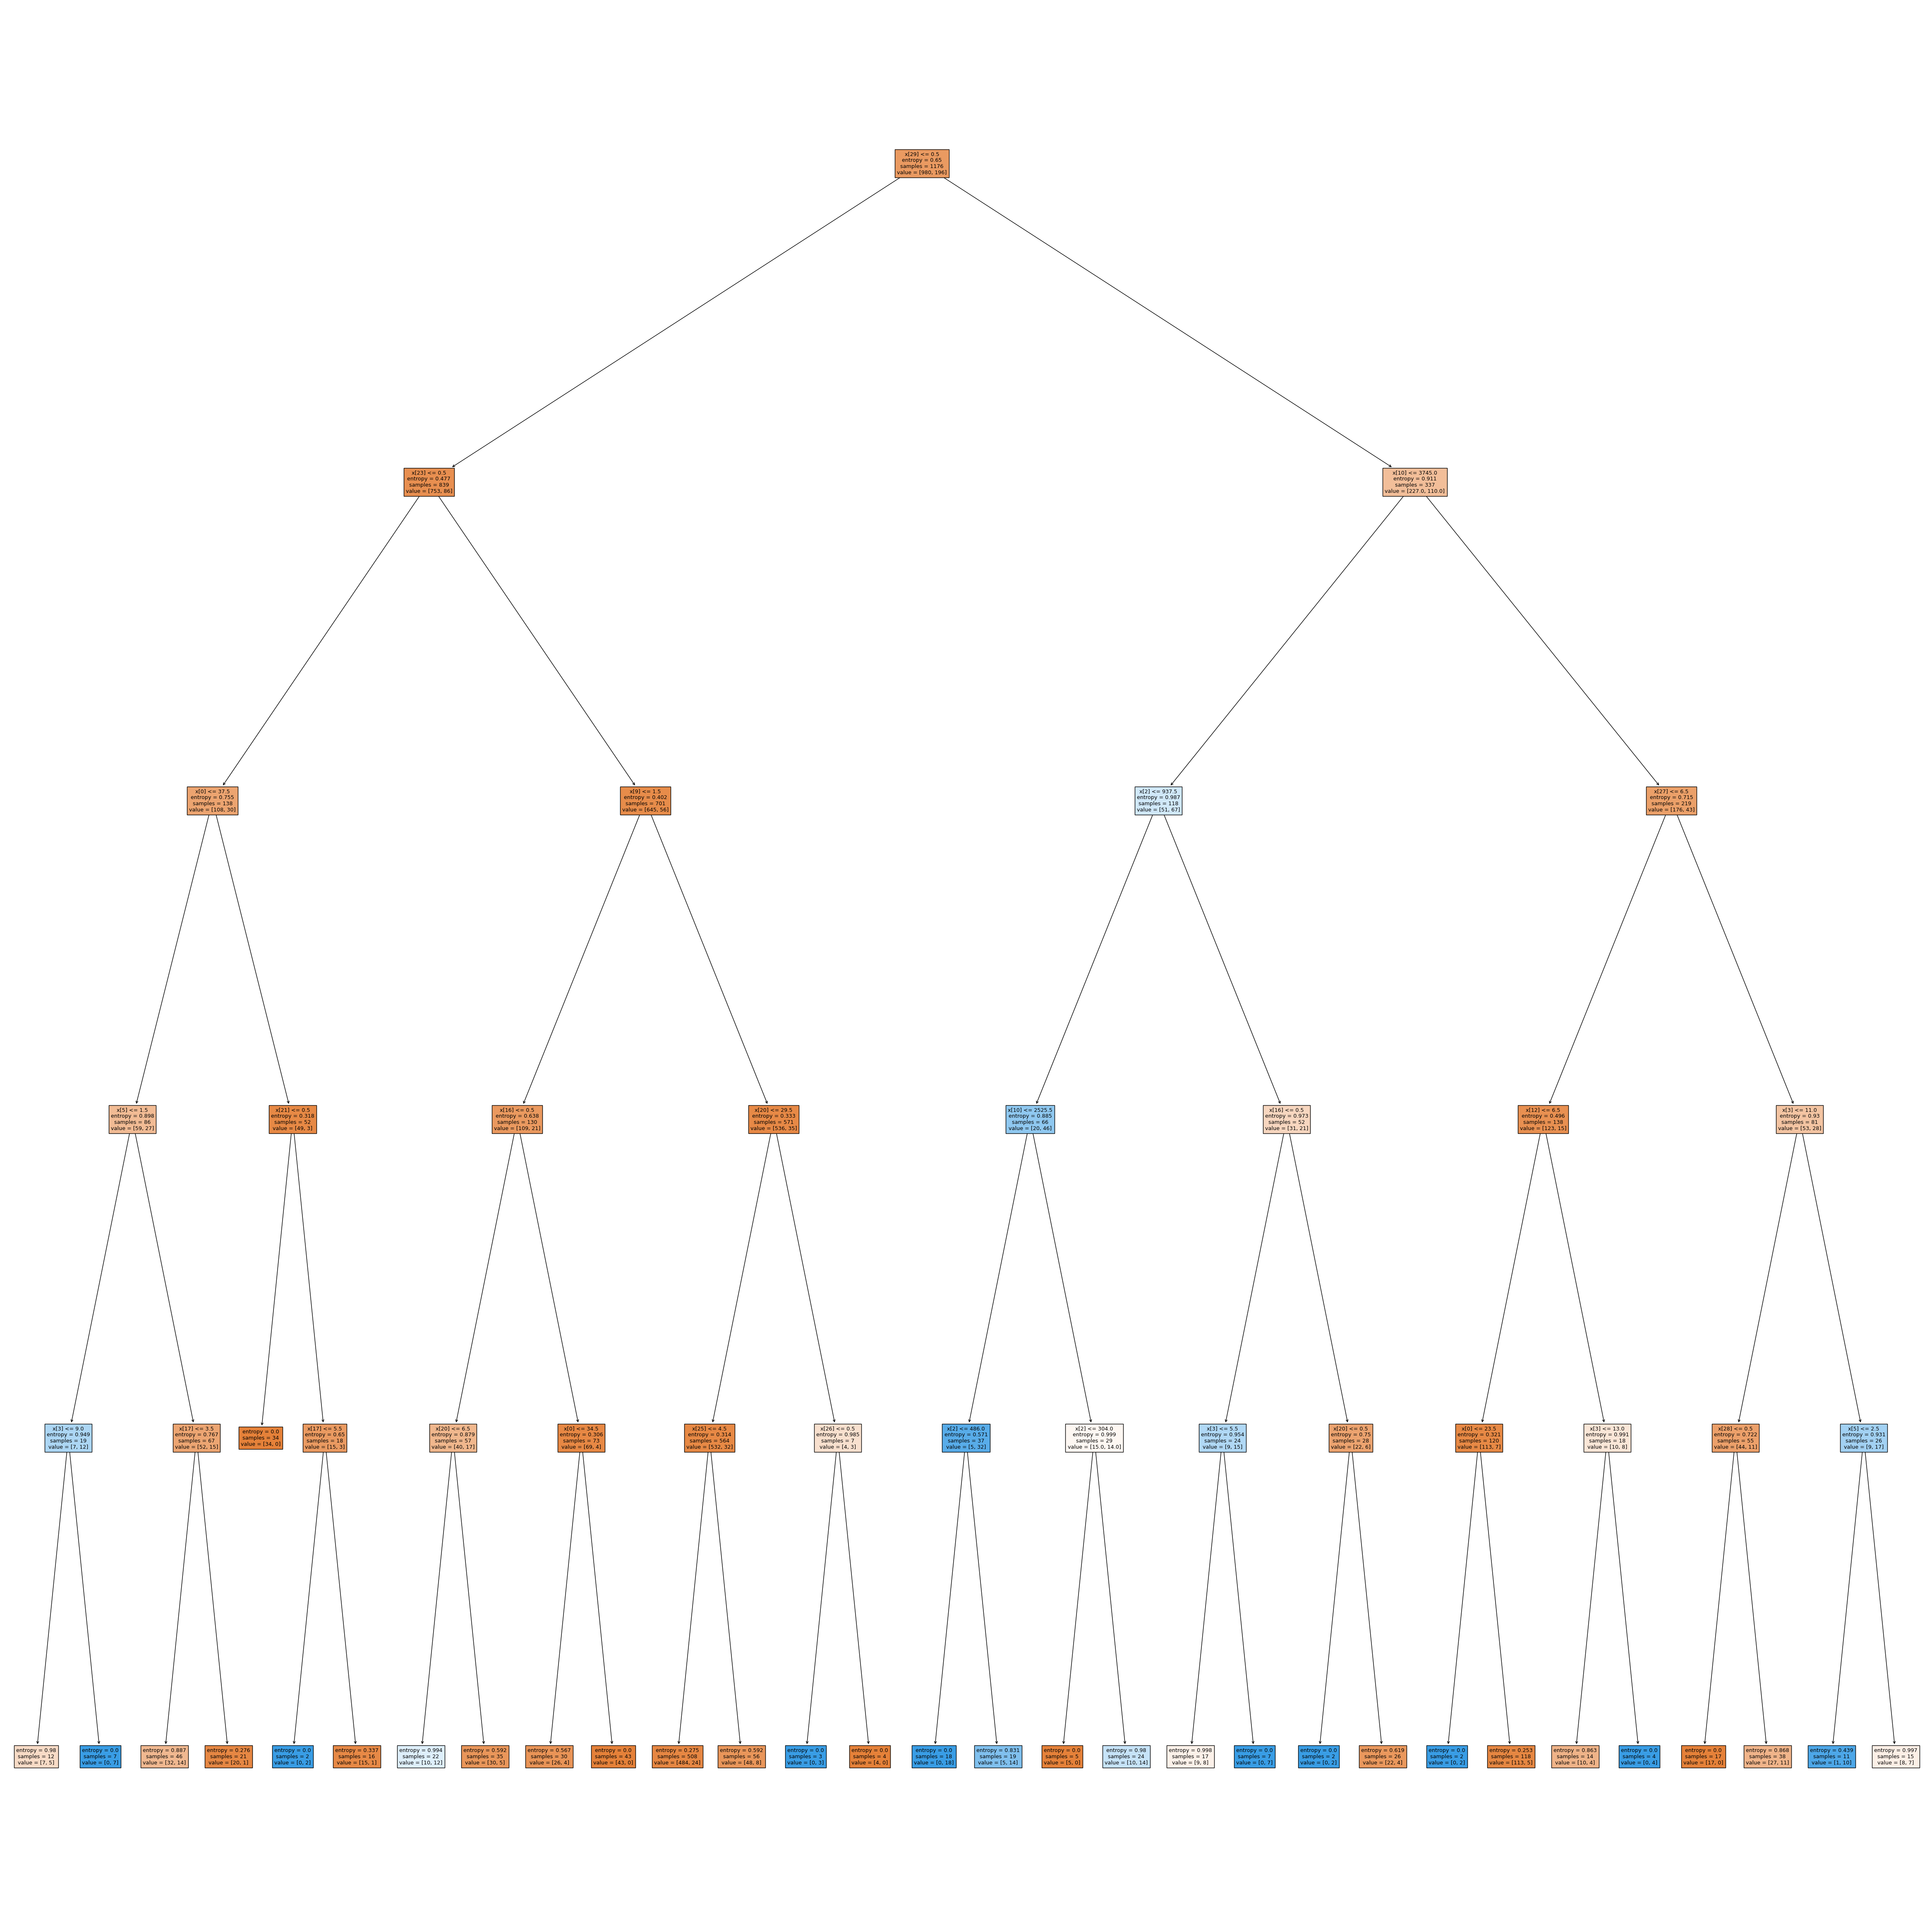

In [ ]:
# Visualizar árbol
plt.figure(figsize=(60, 60))
plot_tree(tree, filled=True)
plt.show()

#### Evaluando modelo

In [ ]:
# Score en datos de entrenamiento
tree.score(X_train, y_train)

0.8920068027210885

In [ ]:
# Score en datos de test
tree_accuracy = tree.score(X_test, y_test)
tree_accuracy

0.8299319727891157

In [ ]:
# recall_tree = recall_score(X_test, y_test, average='weighted')
#tp / (tp + fn)
recall_tree = 12 / (12 + 29)
recall_tree

0.2926829268292683

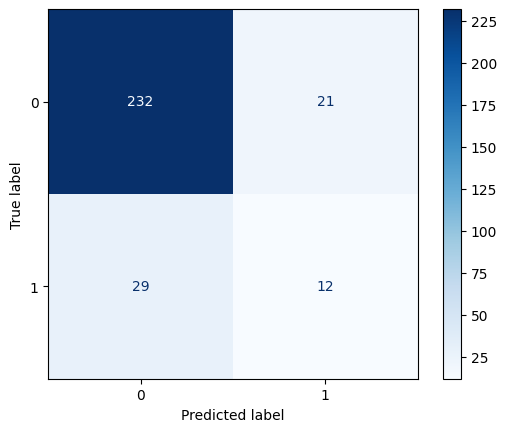

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels = tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = tree.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       253
           1       0.36      0.29      0.32        41

    accuracy                           0.83       294
   macro avg       0.63      0.60      0.61       294
weighted avg       0.82      0.83      0.82       294



In [ ]:
# Curva de validación

range_k = [x for x in range(1,10,3)]

train_score, test_score = validation_curve(tree,
                                           X,
                                           y,
                                           param_name = 'max_depth',
                                           param_range = range_k,
                                           cv = 3,
                                           scoring = 'recall')



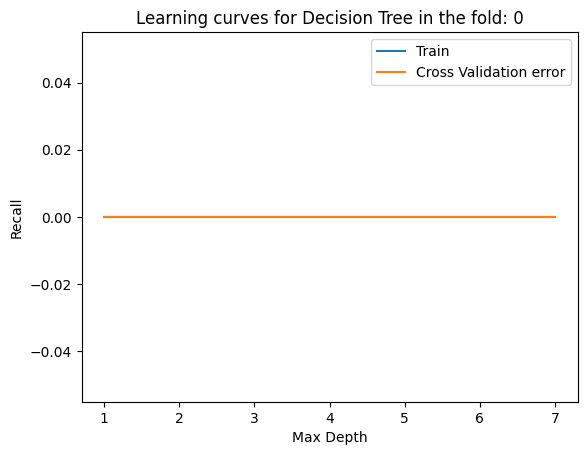

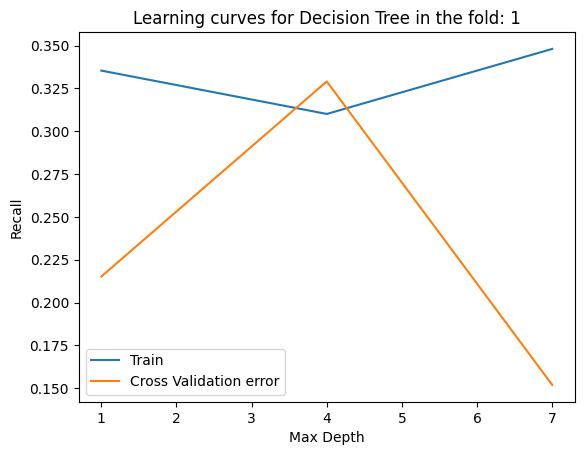

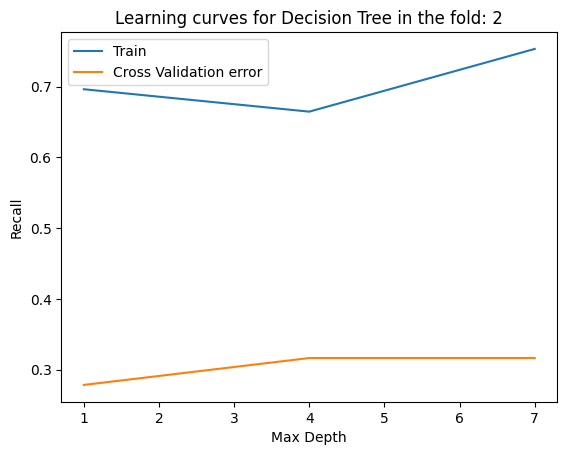

In [ ]:
for i in range(len(train_score)):
    plt.plot(range_k,
             train_score[i],
             label='Train')
    plt.plot(range_k,
             test_score[i],
             label='Cross Validation error')
    plt.title('Learning curves for Decision Tree in the fold: ' + str(i))
    plt.xlabel('Max Depth')
    plt.ylabel('Recall')
    plt.legend()
    plt.show()

#### Conclusiones del modelo

**Precision y Recall para la Clase 0 (Empleados que no han dejado la empresa):**

* Precision para la clase 0: 0.89

* Recall para la clase 0: 0.92

La precisión del 89% indica que, de todas las predicciones positivas para empleados que no han dejado la empresa, el 89% son correctas.

El recall del 92% sugiere que el modelo identifica correctamente al 92% de los empleados que no han dejado la empresa. Esto es positivo ya que queremos asegurarnos de no perder a empleados valiosos que aún permanecen.

**Precision y Recall para la Clase 1 (Empleados que ya han dejado la empresa):**

* Precision para la clase 1: 0.36

* Recall para la clase 1: 0.29

Una precisión del 36% indica que, de todas las predicciones positivas para empleados que ya han dejado la empresa, el 36% son correctas.

El recall del 29% sugiere que el modelo identifica correctamente al 29% de los empleados que ya han dejado la empresa. Este valor es más bajo, lo que indica que el modelo tiene dificultades para identificar eficazmente a los empleados que están propensos a dejar la empresa.


**Accuracy (Exactitud):**

* Accuracy: 0.83

La exactitud indica que el 83% de todas las predicciones son correctas. Sin embargo, dado que el conjunto de datos puede ser desequilibrado, la exactitud por sí sola puede no proporcionar una imagen completa del rendimiento del modelo.

**Macro Average (Promedio Macro):**

* Precision macro avg: 0.63

* Recall macro avg: 0.60

* F1-score macro avg: 0.61

El promedio macro muestra un rendimiento moderado, pero indica que hay variabilidad entre las métricas de las dos clases.


**Weighted Average (Promedio Ponderado):**

* Precision weighted avg: 0.82

* Recall weighted avg: 0.83

* F1-score weighted avg: 0.82

El promedio ponderado tiene en cuenta el desequilibrio de las clases al ponderar las métricas por el número de muestras en cada clase. Muestra un rendimiento global decente.


**Conclusiones:**

El modelo tiene un buen rendimiento en la clasificación de empleados que no han dejado la empresa. Sin embargo, el rendimiento en la clasificación de empleados que ya han dejado la empresa es menos satisfactorio, como se refleja en la baja precision y recall para esa clase.


**Cross Validation**

* Primer K-Fold: Ambas curvas de train y cross-validation tienen un recall constante de 0.0 para todos los valores de max_depth. Esto indica que el modelo no es capaz de identificar positivos correctamente, lo que podría deberse a una falta de complejidad en el árbol.


* Segundo K-Fold: La curva de train muestra un aumento en el recall a medida que max_depth aumenta, alcanzando su punto máximo en 7 con un recall de 0.34. Sin embargo, este valor sigue siendo relativamente bajo.
La curva de cross-validation muestra un comportamiento similar, pero con valores de recall más bajos en general. La discrepancia entre train y cross-validation podría indicar cierto grado de sobreajuste.


* Tercer K-Fold: La curva de train muestra un aumento constante en el recall a medida que max_depth aumenta, alcanzando su punto máximo en 7 con un recall de 0.75. Este aumento sugiere que un árbol más profundo puede ajustarse mejor a los datos de entrenamiento.
La curva de cross-validation también muestra un aumento en el recall con max_depth, aunque los valores son más bajos en comparación con la curva de train. La discrepancia podría indicar cierto grado de sobreajuste, pero la mejora en el recall es evidente.


El aumento en el recall con el aumento de max_depth sugiere que el modelo se beneficia de una mayor complejidad, pero hay que tener cuidado con el sobreajuste.

### Seleccionando el mejor modelo

In [ ]:
data = {
    'Model' : ['SVC',
               'Decision Tree'
               ],

    'AUC' : [recall_svc, recall_tree]
}

In [ ]:
df_score = pd.DataFrame(data)

In [ ]:
df_score.sort_values('AUC')

Model       AUC
0            SVC  0.292683
1  Decision Tree  0.292683

Para hacer la selección  final del modelo, podemos tomar dos caminos:


1.   Utilizar una métrica de 'desempate'
2.   Utilizar el modelo más simple de explicar, en este caso el arbol de decision



* Camino 1

Al ser la métrica de interés el recall y al haber un empate entre los dos modelos seleccionados se decide evaluar una segunda metrica (accuracy)

In [ ]:
data1 = {
    'Model' : ['SVC',
               'Decision Tree'
               ],

    'AUC' : [tree_accuracy, svc_accuracy]
}

df_score1 = pd.DataFrame(data1)

df_score1.sort_values('AUC')

Model       AUC
1  Decision Tree  0.829932
0            SVC  0.857143

Vemos que el modelo SVC tiene mejor precisión en cuanto a la clasificación de las clases, este es el modelo a elegir para el camino 1.

Sin embargo se aborda la opción del camino dos por la simplicidad del modelo árbol de decisión.

## Optimizacion del modelo

### GridSearch

In [ ]:
tree_op = DecisionTreeClassifier(max_depth = 5)

parameters = {'criterion' : ['gini','entropy'],
              'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [ ]:
clf = GridSearchCV(estimator = tree_op,
                   param_grid = parameters,
                   scoring='recall',
                   cv=10)

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='recall')

In [ ]:
clf.best_score_

0.37605263157894736

In [ ]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [ ]:
ans = np.array(clf.cv_results_['mean_test_score'].reshape(10,2))

ans

array([[0.        , 0.27052632],
       [0.19421053, 0.245     ],
       [0.28473684, 0.31552632],
       [0.34105263, 0.37605263],
       [0.36      , 0.36526316],
       [0.        , 0.30105263],
       [0.16894737, 0.23973684],
       [0.22973684, 0.255     ],
       [0.33157895, 0.31157895],
       [0.35763158, 0.36789474]])

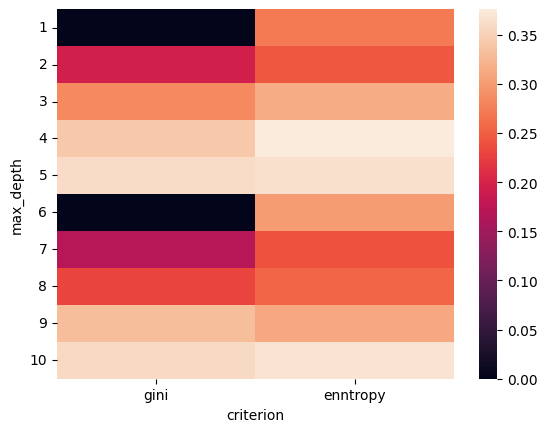

In [ ]:
plt.figure()
sns.heatmap(ans.reshape(10,2), xticklabels=['gini','enntropy'], yticklabels=[1,2,3,4,5,6,7,8,9,10])
plt.ylabel("max_depth")
plt.xlabel("criterion")
plt.yticks(rotation=0);

Con esto, podemos observar que los mejores parámetros para el modelo de árbol de decisión seleccionado son:
*
```
max_depth = 8
```

*
```
criterion = 'gini'
```

Aumentando la métrica de recall de **29.26%** a un  máximo de **37.60**




## Rendimiento del modelo

### ROC curve and Precision-Recall curve

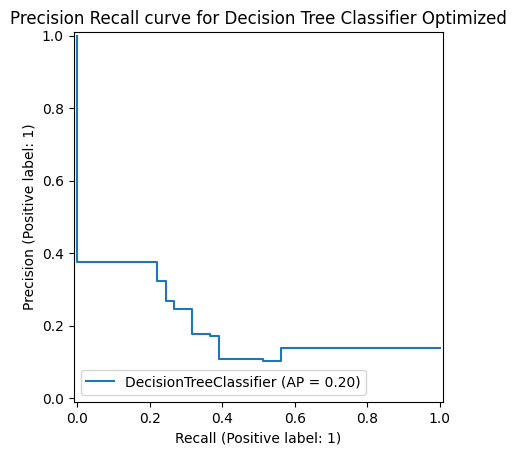

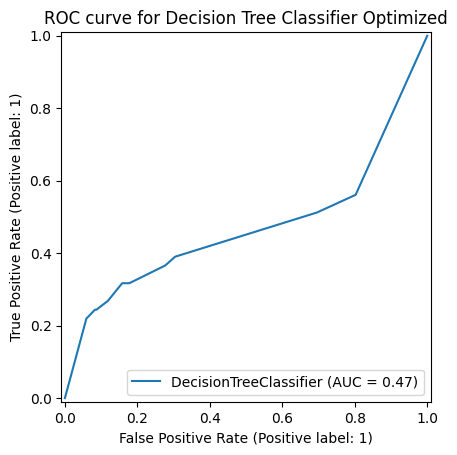

In [ ]:
curve_pr = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name = 'DecisionTreeClassifier'
)
curve_pr = curve_pr.ax_.set_title('Precision Recall curve for Decision Tree Classifier Optimized')

roc = RocCurveDisplay.from_estimator(
    clf, X_test, y_test, name = 'DecisionTreeClassifier'
)
roc = roc.ax_.set_title('ROC curve for Decision Tree Classifier Optimized')

La **Curva de Precisión-Recall** representa la relación entre la Precisión y la Sensibilidad (Recall).

En este caso al tener un área bajo la curva demasiado baja indica un desequilibrio entre ambas métricas, además al estar alejada de la esquina superior dereche podemos decir que el rendimiento del modelo en cuanto a clasificar la clase 1 (Empleados que han dejado la empresa) que es la clase minoritaria.


La **Curva ROC** epresenta la relación entre la Tasa de Verdaderos Positivos (Sensibilidad) y la Tasa de Falsos Positivos.

En este caso la Curva ROC con AUC = 0.47 sugiere que el modelo actual tiene limitaciones en su capacidad para clasificar eficazmente entre las clases positivas y negativas.

## Over Sampling

Al tener los datos desbalanceados es necesario pensar en una solución para tener un mayor equilibrio entre las clases, por lo que se sugiere *Over Sampling*

In [ ]:
# Verificanco el desequilibrio
y_train.value_counts()

Attrition
0            980
1            196
dtype: int64

Ya que la clase 1 es sólo el 20% de la clase 0

In [ ]:
# Over sampling

X, y = make_classification(n_samples = 1470, n_features = 30,
                           random_state = 0)

ros = RandomOverSampler(random_state = 0)

X_resampled, y_resampled = ros.fit_resample(X, y)

print(sorted(Counter(y_resampled).items()))


[(0, 740), (1, 740)]


### Modelo con clases balanceadas (árbol de decisión)

#### Dividir dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20,
                                                        random_state = 1998)

#### Ejecutando modelo

In [ ]:
# Creamos el modelo
tree_balance = DecisionTreeClassifier(criterion = 'gini',
                                   max_depth = 8)

# Ajustamos el modelo a los datos de entrenamiento
tree_balance.fit(X_train, y_train)

# Realizamos la predicción
y_pred = tree_balance.predict(X_test)

#### Evaluando modelo

In [ ]:
# Score en datos de entrenamiento
tree_balance.score(X_train, y_train)

0.9898648648648649

In [ ]:
# Score en datos de test
tree_accuracy = tree_balance.score(X_test, y_test)
tree_accuracy

0.9628378378378378

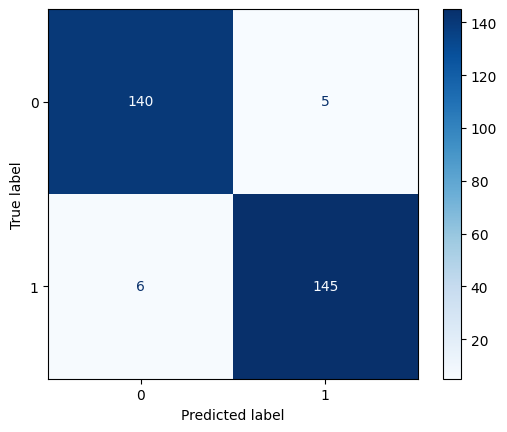

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels = tree_balance.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = tree_balance.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# recall_tree = recall_score(X_test, y_test, average='weighted')
#tp / (tp + fn)
recall_tree = 145 / (145 + 6)
recall_tree

0.9602649006622517

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       145
           1       0.97      0.96      0.96       151

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296



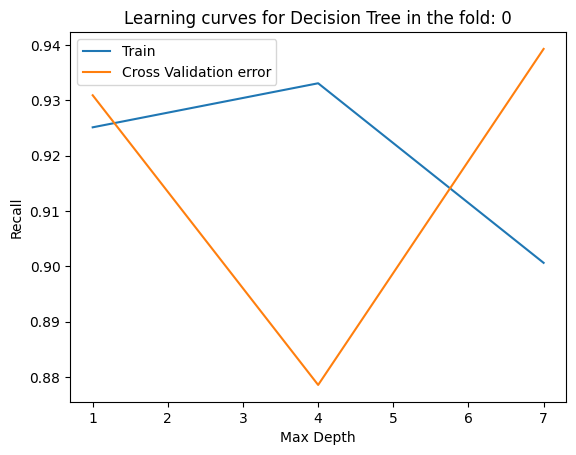

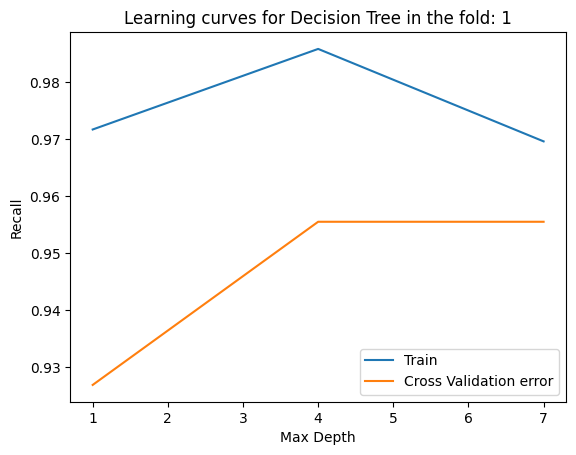

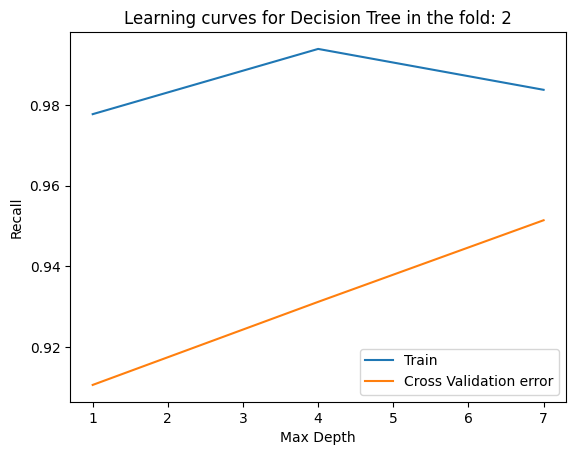

In [ ]:
# Curva de validación

range_k = [x for x in range(1,10,3)]

train_score, test_score = validation_curve(tree_balance,
                                           X,
                                           y,
                                           param_name = 'max_depth',
                                           param_range = range_k,
                                           cv = 3,
                                           scoring = 'recall')
for i in range(len(train_score)):
    plt.plot(range_k,
             train_score[i],
             label='Train')
    plt.plot(range_k,
             test_score[i],
             label='Cross Validation error')
    plt.title('Learning curves for Decision Tree in the fold: ' + str(i))
    plt.xlabel('Max Depth')
    plt.ylabel('Recall')
    plt.legend()
    plt.show()

#### Conclusiones del modelo


**Interpretaciones para cada k-fold:**

* **Primer K-Fold:**

  *   La curva de train muestra un aumento en el recall a medida que max_depth aumenta, alcanzando su punto máximo en 4 con un recall de 0.935 y luego disminuyendo ligeramente a 0.9 con max_depth de 7.
  *   La curva de cross-validation muestra un comportamiento similar, alcanzando su punto máximo en 4 con un recall de 0.88 y aumentando a 0.94 con max_depth de 7.

El modelo tiene un rendimiento sólido en el conjunto de entrenamiento, pero parece haber cierto grado de sobreajuste en max_depth de 7, ya que el recall disminuye en ese punto.


* **Segundo K-Fold:**

  * La curva de train muestra un aumento constante en el recall a medida que max_depth aumenta, alcanzando su punto máximo en 4 con un recall de 0.985 y luego disminuyendo ligeramente a 0.97 con max_depth de 7.
  * La curva de cross-validation muestra un comportamiento similar, alcanzando su punto máximo en 4 con un recall de 0.955 y manteniéndose relativamente estable en 0.955 con max_depth de 7.

El modelo generaliza bien en el conjunto de prueba, y no hay indicios de sobreajuste en este k-fold. El rendimiento en términos de recall es alto y estable.


* **Tercer K-Fold:**

  * La curva de train muestra un aumento constante en el recall a medida que max_depth aumenta, alcanzando su punto máximo en 4 con un recall de 0.99 y luego disminuyendo ligeramente a 0.98 con max_depth de 7.
  * La curva de cross-validation muestra una disminución en el recall, alcanzando su punto máximo en 4 con un recall de 0.955 y luego disminuyendo a 0.943 con max_depth de 7.

El modelo tiene un rendimiento sólido en el conjunto de entrenamiento, pero podría haber cierto grado de sobreajuste en max_depth de 7, ya que el recall disminuye en ese punto en el conjunto de validación.


En general, se observa un patrón en el que el recall tiende a aumentar con max_depth hasta cierto punto, y luego puede disminuir, indicando la presencia de sobreajuste.

En resumen, el modelo parece tener un buen rendimiento en términos de recall, pero es importante tener en cuenta la posibilidad de sobreajuste.